# Название проекта: разработка системы персонализированных предложений для повышения покупательской активности постоянных клиентов.

# Описание Проекта:
Данный проект направлен на анализ данных о поведении покупателей на сайте, их взаимодействии с сервисом и покупательской активности. Для этого нужно разработать модель, способную прогнозировать изменения в покупательской активности и на основе этого формировать индивидуальные предложения для постоянных клиентов, стимулируя их к увеличению закупок.

# Цель Проекта:
Разработать решение, которое будет предлагать индивидуальные предложения постоянным клиентам с целью повышения их покупательской активности.

# Ход Проекта:

1.  **Загрузка данных:**
    *   Загрузка таблиц `market_file.csv`, `market_money.csv`, `market_time.csv`, `money.csv` в рабочую среду.

2.  **Предобработка данных:**
    *   Очистка данных от пропусков, дубликатов и аномалий.
    *   Преобразование типов данных при необходимости.
    *   Обработка категориальных признаков.

3.  **Исследовательский анализ данных (EDA):**
    *   Изучение распределений признаков.
    *   Визуализация взаимосвязей между признаками и целевой переменной.
    *   Выявление паттернов в поведении покупателей.

4.  **Объединение таблиц:**
    *   Создание единого датасета путем слияния таблиц `market_file.csv`, `market_money.csv`, `market_time.csv`, `money.csv` по общему идентификатору покупателя (`id`).

5.  **Корреляционный анализ:**
    *   Оценка степени линейной зависимости между числовыми признаками и целевой переменной.
    *   Визуализация матрицы корреляций.

6.  **Использование пайплайнов (Pipelines):**
    *   Создание пайплайнов для автоматизации шагов предобработки и моделирования.
    *   Повышение воспроизводимости и эффективности рабочего процесса.

7.  **Анализ важности признаков:**
    *   Определение наиболее значимых признаков, влияющих на покупательскую активность.
    *   Использование методов, таких как Feature Importance из моделей деревьев решений или статистические тесты.

8.  **Сегментация покупателей:**
    *   Разделение покупателей на группы по схожим характеристикам и поведению.
    *   Применение методов кластеризации (например, K-Means).
    *   Адаптация предложений для каждого сегмента.

9. **Общий вывод.**


## Загрузка данных

In [1]:
#импорт бибилиотек

!pip install shap -q #для интерпретации МО
!pip install scikit-learn==1.1.3 -q #установка конкретной версии scikit-learn
import shap #для объяснения предсказаний МО
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from scipy import stats as st 
from matplotlib import pyplot as plt
import seaborn as sns 
import sklearn
#Подмодуль model_selection из scikit-learn для разделения данных на обучающую и тестовую выборки,
#а также для поиска лучших гиперпараметров
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline #для создания цепочек преобразований и моделей
from sklearn.linear_model import LogisticRegression #модель логистической регрессии
#для различных методов предобработки данных
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score #для оценки качества моделей
from sklearn.compose import ColumnTransformer #для комбинирования различных преобразований признаков
from sklearn.neighbors import KNeighborsClassifier #kNN
from sklearn.tree import DecisionTreeClassifier #дерево
from sklearn.svm import SVC #опорные вектора
from sklearn.impute import SimpleImputer #для заполнения пропущенных значений
from sklearn.feature_selection import SelectKBest, f_classif #для отбора признаков
import re # Импортируем модуль для работы с регулярными выражениями

RANDOM_STATE = 42
TEST_SIZE = 0.25

In [2]:
#загрузка и первичный осмотр данных о пользовательской активности
market = pd.read_csv('/datasets/market_file.csv')
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [3]:
market.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [4]:
#загрузка и первичный осмотр данных о доходах магазина по покупателям
market_money = pd.read_csv('/datasets/market_money.csv')
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [5]:
market_money.head()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [6]:
#загрузка и первичный осмотр данных о времени, проведенном покупателями на сайте
market_time = pd.read_csv('/datasets/market_time.csv')
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [7]:
market_time.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [8]:
#загрузка и первичный осмотр данных о среднемесячной прибыли от покупателей (3 мес.)
money = pd.read_csv('/datasets/money.csv', sep=';', decimal=',')
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


In [9]:
money.head()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


**Выводы**

1. Проверка данных выявила их полное соответствие описанию
2. Таблицы не содержат пропущенных значений
3. Типы данных в столбцах определены надлежащим образом

## Предобработка данных

### Обработка дубликатов

In [10]:
print(f'Дубликаты в market_file.csv: {market.duplicated().sum()}')

print(f'Дубликаты в market_money.csv: {market_money.duplicated().sum()}')

print(f'Дубликаты в market_time.csv: {market_time.duplicated().sum()}')

print(f'Дубликаты в money.csv: {money.duplicated().sum()}')

Дубликаты в market_file.csv: 0
Дубликаты в market_money.csv: 0
Дубликаты в market_time.csv: 0
Дубликаты в money.csv: 0


In [11]:
#получение списка уникальных значений из столбца 'Тип сервиса'
market['Тип сервиса'].unique()

array(['премиум', 'стандартт', 'стандарт'], dtype=object)

In [12]:
#переименовываем дубликаты
market.loc[market['Тип сервиса'] == 'стандартт', 'Тип сервиса'] = 'стандарт'

#проверяем уникальные значения
market['Тип сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

Также нужно изменить названия столбцов

In [13]:
market_time.loc[market_time['Период'] == 'предыдцщий_месяц', 'Период'] = 'предыдущий_месяц'
print(market_time)

          id            Период  минут
0     215348     текущий_месяц     14
1     215348  предыдущий_месяц     13
2     215349     текущий_месяц     10
3     215349  предыдущий_месяц     12
4     215350     текущий_месяц     13
...      ...               ...    ...
2595  216645     текущий_месяц     18
2596  216646  предыдущий_месяц     18
2597  216646     текущий_месяц      7
2598  216647     текущий_месяц     10
2599  216647  предыдущий_месяц     15

[2600 rows x 3 columns]


In [14]:
def to_snake_case(col_name):
    #приводим к нижнему регистру
    col_name = col_name.lower()
    #заменяем пробелы и другие небуквенно-цифровые символы (кроме _) на подчеркивания
    col_name = re.sub(r'[^a-zа-я0-9_]+', '_', col_name)
    #удаляем повторяющиеся подчеркивания
    col_name = re.sub(r'__+', '_', col_name)
    #удаляем подчеркивания в начале и конце строки
    col_name = col_name.strip('_')
    #преобразуем CamelCase (если есть) в snake_case
    col_name = re.sub(r'(?<!^)(?=[A-Z])', '_', col_name).lower()
    return col_name

#применяем функцию к названиям столбцов
market_time.columns = [to_snake_case(col) for col in market_time.columns]
print(market_time)

          id            период  минут
0     215348     текущий_месяц     14
1     215348  предыдущий_месяц     13
2     215349     текущий_месяц     10
3     215349  предыдущий_месяц     12
4     215350     текущий_месяц     13
...      ...               ...    ...
2595  216645     текущий_месяц     18
2596  216646  предыдущий_месяц     18
2597  216646     текущий_месяц      7
2598  216647     текущий_месяц     10
2599  216647  предыдущий_месяц     15

[2600 rows x 3 columns]


In [15]:
market_money.columns = [to_snake_case(col) for col in market_money.columns]
print(market_money)

          id               период  выручка
0     215348  препредыдущий_месяц      0.0
1     215348        текущий_месяц   3293.1
2     215348     предыдущий_месяц      0.0
3     215349  препредыдущий_месяц   4472.0
4     215349        текущий_месяц   4971.6
...      ...                  ...      ...
3895  216646  препредыдущий_месяц   4725.0
3896  216646     предыдущий_месяц   4923.0
3897  216647     предыдущий_месяц   4720.0
3898  216647  препредыдущий_месяц   5183.0
3899  216647        текущий_месяц   4448.3

[3900 rows x 3 columns]


In [16]:
money.columns = [to_snake_case(col) for col in money.columns]
print(money)

          id  прибыль
0     215348     0.98
1     215349     4.16
2     215350     3.13
3     215351     4.87
4     215352     4.21
...      ...      ...
1295  216643     4.44
1296  216644     6.11
1297  216645     3.29
1298  216646     4.03
1299  216647     3.28

[1300 rows x 2 columns]


In [17]:
market.columns = [to_snake_case(col) for col in market.columns]
print(market)

          id покупательская_активность тип_сервиса разрешить_сообщать  \
0     215348                 Снизилась     премиум                 да   
1     215349                 Снизилась     премиум                 да   
2     215350                 Снизилась    стандарт                нет   
3     215351                 Снизилась    стандарт                 да   
4     215352                 Снизилась    стандарт                нет   
...      ...                       ...         ...                ...   
1295  216643           Прежний уровень    стандарт                 да   
1296  216644           Прежний уровень    стандарт                нет   
1297  216645           Прежний уровень    стандарт                 да   
1298  216646           Прежний уровень    стандарт                 да   
1299  216647           Прежний уровень     премиум                 да   

      маркет_актив_6_мес  маркет_актив_тек_мес  длительность  \
0                    3.4                     5           12

**Вывод**
1. Проведена очистка данных от неявных дубликатов
2. Осуществлена коррекция некорректного названия столбца

## Исследовательский анализ данных

In [18]:
def vid_num_variable(df, column):
    sns.set(rc={"figure.figsize": (15, 5)}) #установка размера фигур для графиков

    #определение дискретности
    n_unique = df[column].nunique()
    n_total = df[column].count() #исключаем NaN

    #пороги для определения дискретности. Настройте их под свои данные!
    #пример: меньше 30 уникальных значений ИЛИ доля уникальных значений от общего числа < 10%
    is_discrete = (n_unique <= 30) or (n_total > 0 and (n_unique / n_total) < 0.1)

    #дополнительные проверки для более надежного определения
    if pd.api.types.is_bool_dtype(df[column]):
        is_discrete = True
    if df[column].dtype == 'object' and n_unique <= 5: # Например, для категорий, представленных числами
        is_discrete = True
    #если есть очень много NaN, но при этом уникальных значений мало среди не-NaN, тоже дискретный
    if n_total > 0 and (n_unique / n_total) < 0.05 and n_unique <= 10:
        is_discrete = True


    fig, axes = plt.subplots(1, 2) #создание фигуры

    #условное построение графиков
    if is_discrete:
        print(f"'{column}' определен как ДИСКРЕТНЫЙ. Используется countplot.")
        #для дискретных используем countplot (или barplot для частот)
        #сортируем по убыванию частоты для лучшей читаемости
        order = df[column].value_counts().index
        sns.countplot(data=df, y=column, order=order, ax=axes[0], palette='viridis')
        axes[0].set(ylabel=column, xlabel='Частота')
        axes[0].set_title(f'Частота значений для {column}')


    else:
        print(f"'{column}' определен как НЕПРЕРЫВНЫЙ. Используется histplot и boxplot.")
        #для непрерывных используем гистограмму и boxplot
        sns.histplot(data=df[column], bins=20, ax=axes[0], kde=True, palette='viridis') #kde=True добавляет кривую плотности
        axes[0].set(ylabel='Частота', xlabel=column)
        axes[0].set_title(f'Гистограмма распределения {column}')

        sns.boxplot(data=df[column], ax=axes[1], palette='viridis')
        axes[1].set(ylabel=column, xlabel='Значение') #указываем, что Y - это значения
        axes[1].set_title(f'Boxplot для {column}')

    plt.suptitle(f'Анализ столбца: {column}', y=1.02) #y=1.02 поднимает заголовок немного выше
    plt.tight_layout() #автоматически корректирует расположение подграфиков
    plt.show()

In [19]:
#распределение категориальной переменной с помощью столбчатой диаграммы
def vid_cat_variable(df, column):
    sns.countplot(data = df, x=column) #построение столбчатой диаграммы для подсчета частоты категорий

    plt.suptitle(f'Распределение {column}')
    plt.show()

Применяем функции к нашим данным

### Распределение ***market:***

'маркет_актив_6_мес' определен как ДИСКРЕТНЫЙ. Используется countplot.


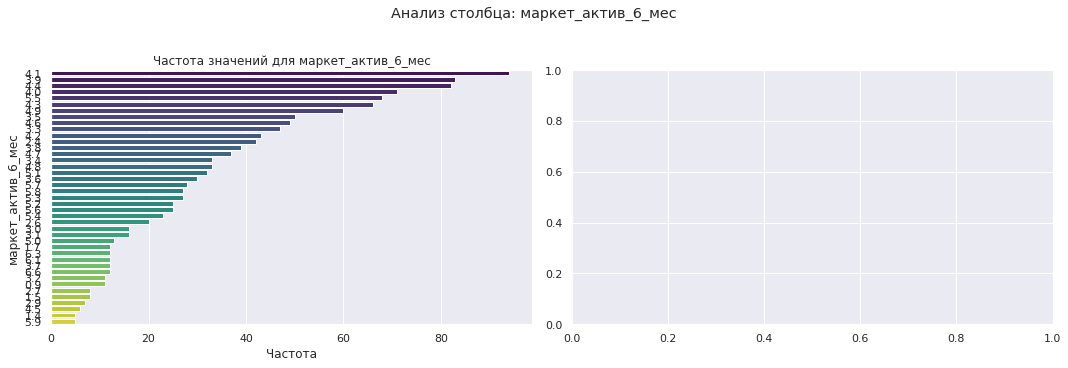

'маркет_актив_тек_мес' определен как ДИСКРЕТНЫЙ. Используется countplot.


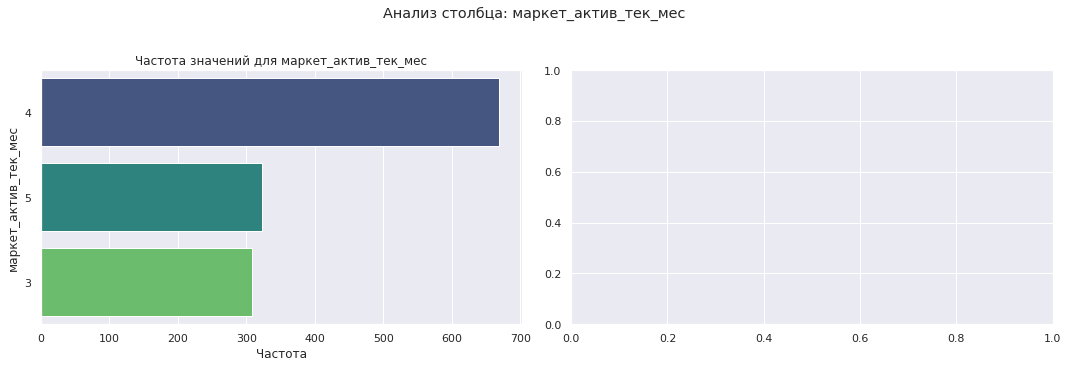

'длительность' определен как НЕПРЕРЫВНЫЙ. Используется histplot и boxplot.


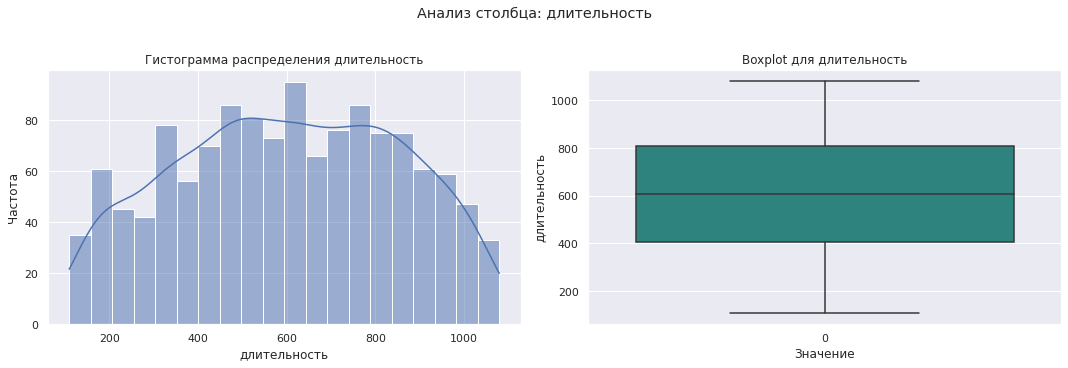

'акционные_покупки' определен как ДИСКРЕТНЫЙ. Используется countplot.


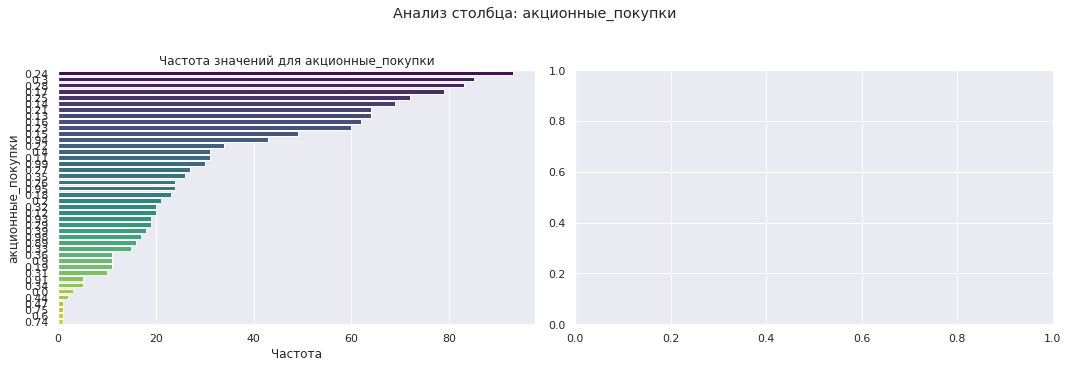

'средний_просмотр_категорий_за_визит' определен как ДИСКРЕТНЫЙ. Используется countplot.


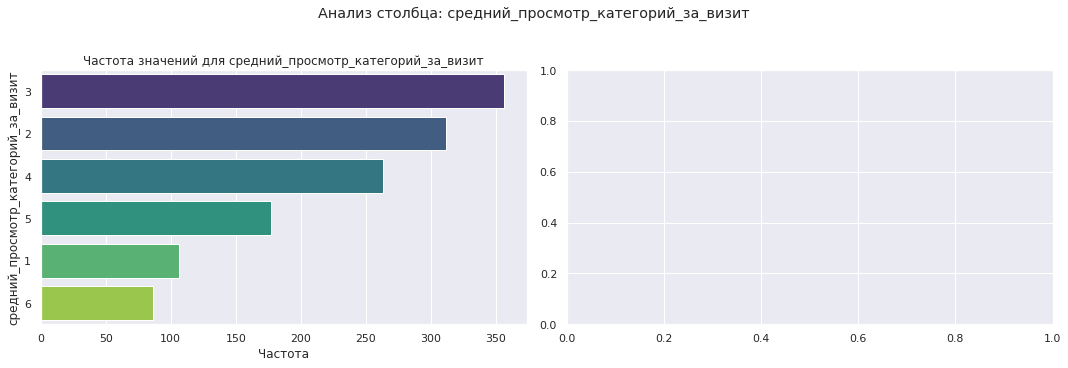

'неоплаченные_продукты_штук_квартал' определен как ДИСКРЕТНЫЙ. Используется countplot.


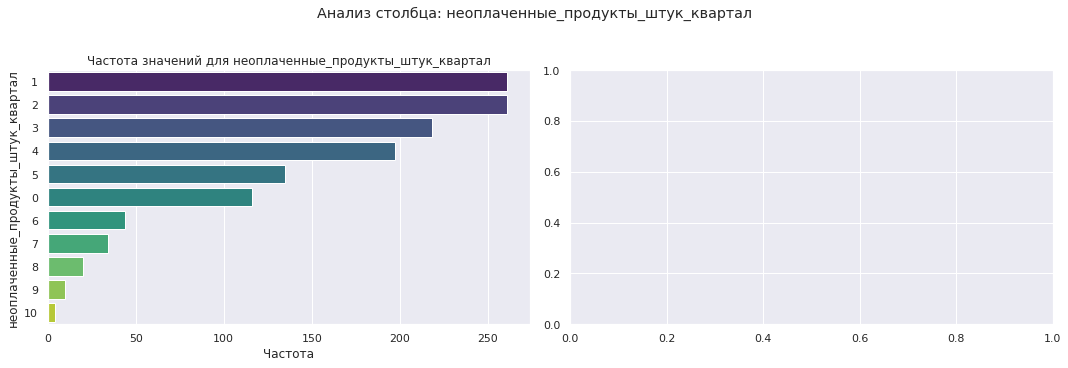

'ошибка_сервиса' определен как ДИСКРЕТНЫЙ. Используется countplot.


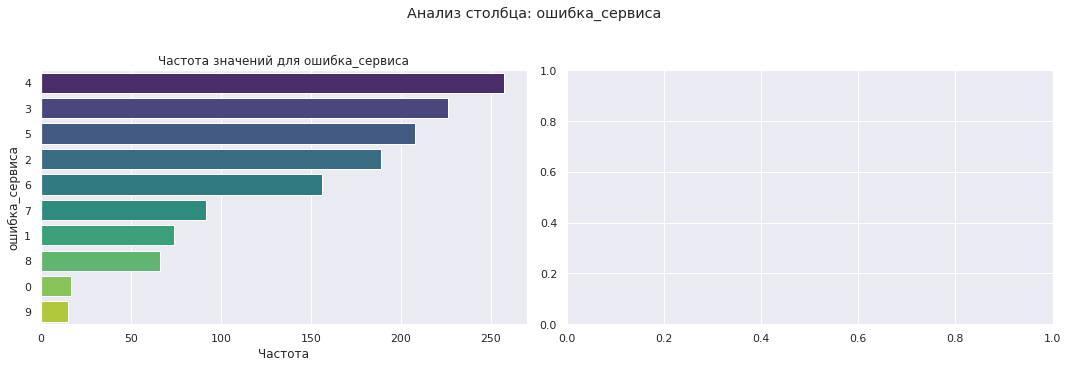

'страниц_за_визит' определен как ДИСКРЕТНЫЙ. Используется countplot.


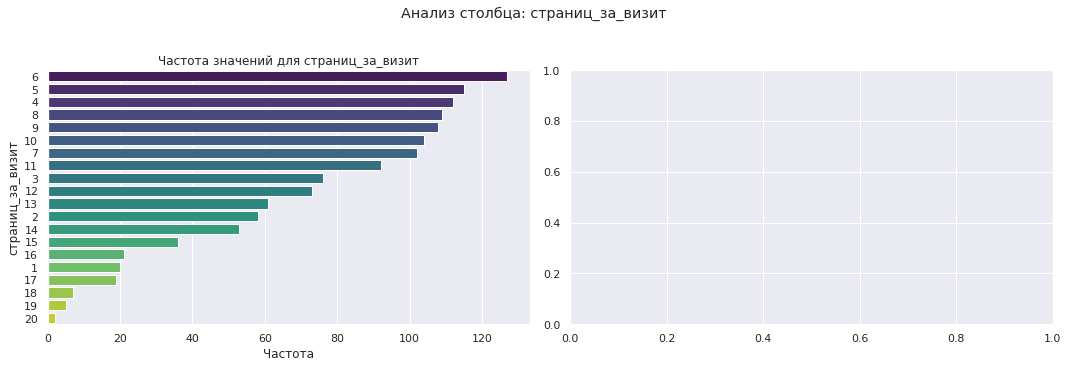

In [20]:
#распределение количественных признаков
for name in market.select_dtypes(include=['int64', 'float64']).columns.tolist()[1:]:
    vid_num_variable(market, name)
    market[name].describe()

Прежний уровень    802
Снизилась          498
Name: покупательская_активность, dtype: int64


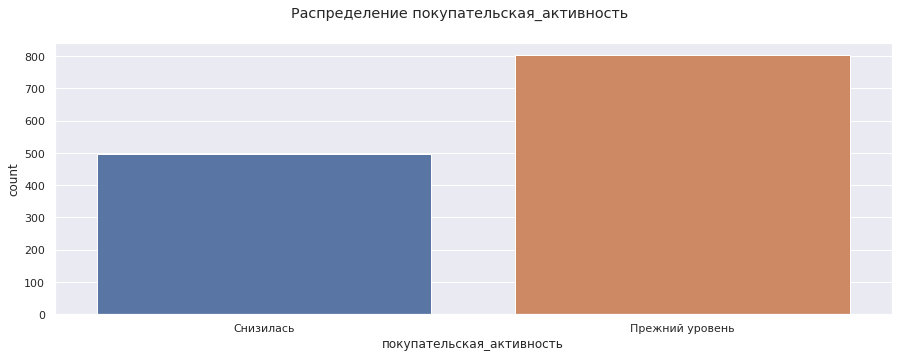

стандарт    924
премиум     376
Name: тип_сервиса, dtype: int64


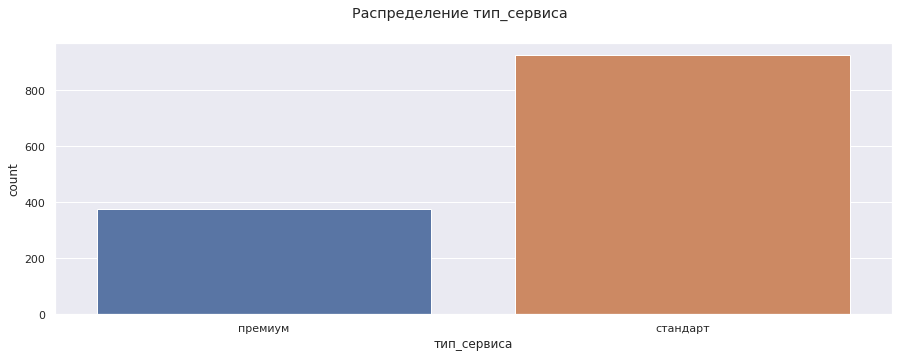

да     962
нет    338
Name: разрешить_сообщать, dtype: int64


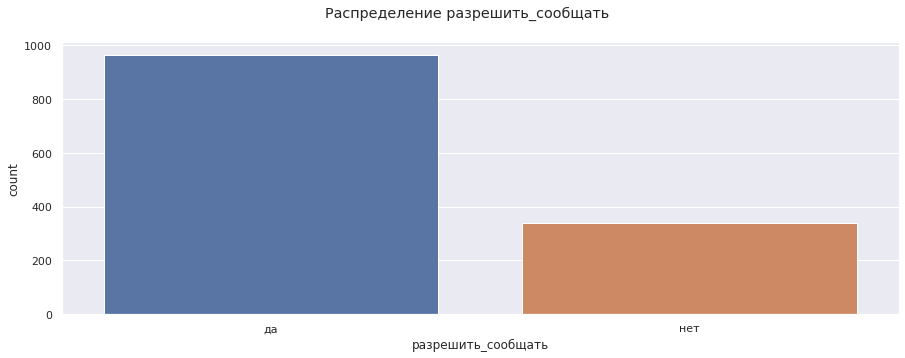

Товары для детей                        330
Домашний текстиль                       251
Косметика и аксесуары                   223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: популярная_категория, dtype: int64


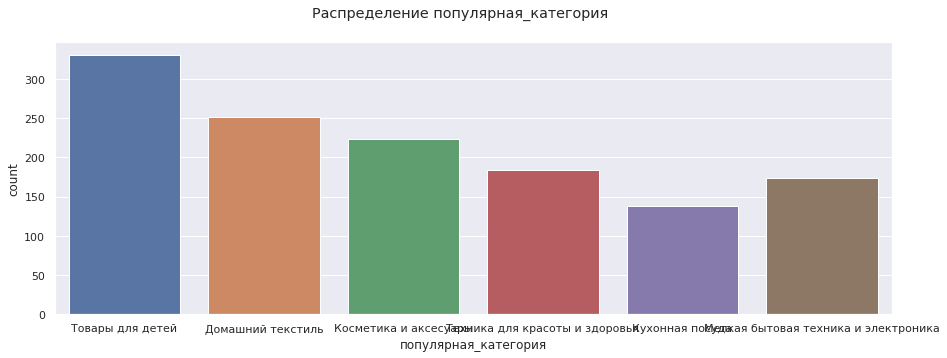

In [21]:
#распределение категориальных признаков
for name in market.select_dtypes(include='object').columns.tolist():
    print(market[name].value_counts())
    vid_cat_variable(market, name)

### Распределение ***market_money***

'выручка' определен как НЕПРЕРЫВНЫЙ. Используется histplot и boxplot.


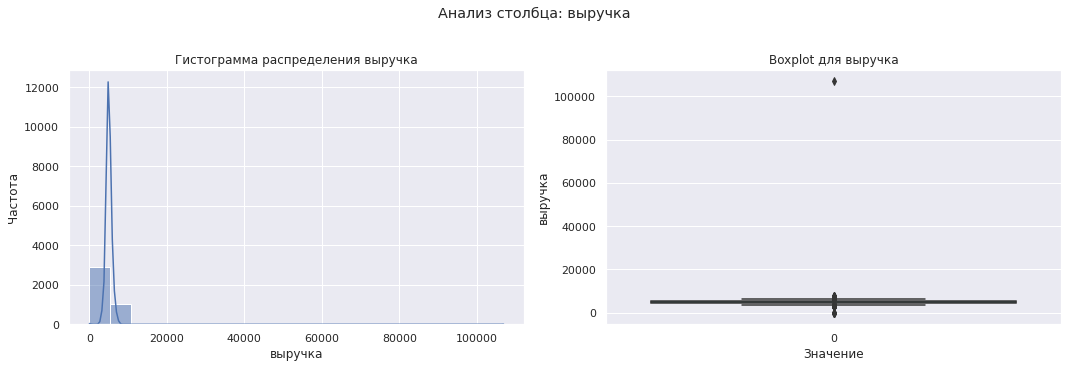

count      3900.000000
mean       5025.696051
std        1777.704104
min           0.000000
25%        4590.150000
50%        4957.500000
75%        5363.000000
max      106862.200000
Name: выручка, dtype: float64

In [22]:
#распределение количественных признаков
vid_num_variable(market_money, 'выручка')
market_money['выручка'].describe()

In [23]:
#исходя из диаграмм, нам нужно отфильтровать DataFrame 'market_money'
#оставляя только те строки, где значение в столбце 'Выручка' больше 20000
market_money[market_money['выручка'] > 20000]

,id,период,выручка
98,215380,текущий_месяц,106862.2


У нас есть одно аномальное значение, из-за которого не получится качественно проанилизировать данные. Так как такое значение только одно - его можно спокойно удалить без последствий. Это мы и сделаем.

In [24]:
#удаляем аномальное значение из всех датафреймов
market_money = market_money[market_money['id'] != 215380]
market = market[market['id'] != 215380]
market_time = market_time[market_time['id'] != 215380]
money = money[money['id'] != 215380]

'выручка' определен как НЕПРЕРЫВНЫЙ. Используется histplot и boxplot.


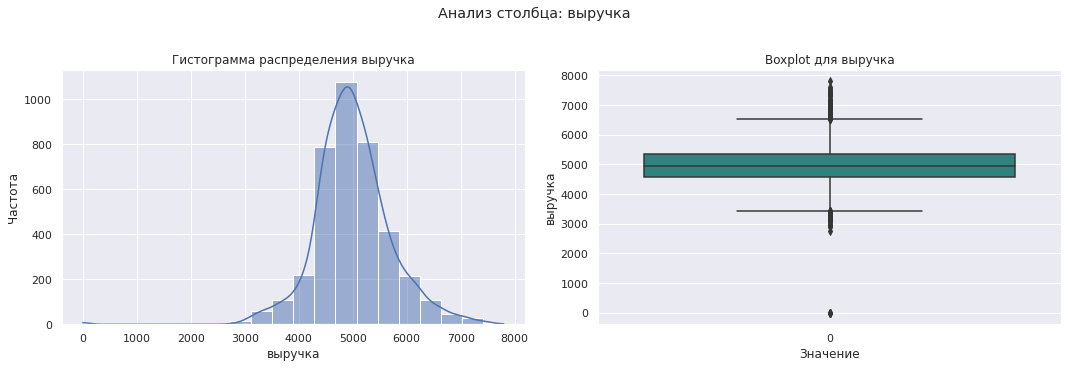

count    3897.000000
mean     4999.287760
std       706.970089
min         0.000000
25%      4590.000000
50%      4956.000000
75%      5363.000000
max      7799.400000
Name: выручка, dtype: float64

In [25]:
#проверяем теперь наше распределение выручки
vid_num_variable(market_money, 'выручка')
market_money['выручка'].describe()

### Распределение ***market_time***

текущий_месяц
'минут' определен как ДИСКРЕТНЫЙ. Используется countplot.


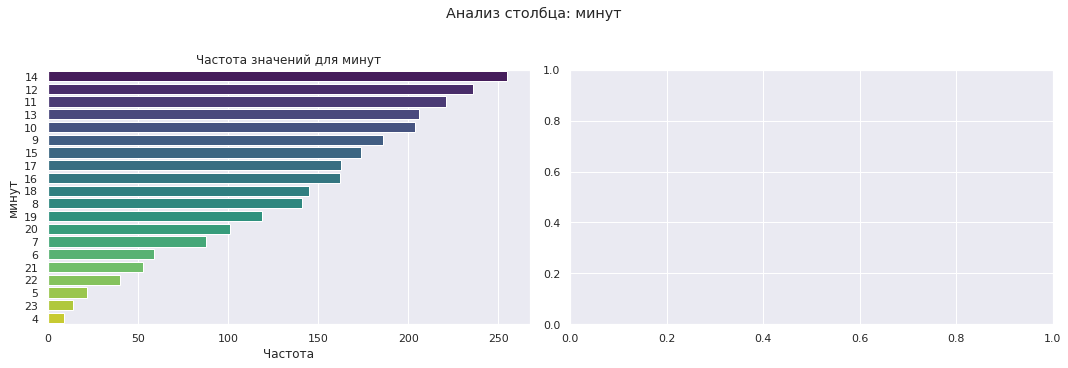

предыдущий_месяц
'минут' определен как ДИСКРЕТНЫЙ. Используется countplot.


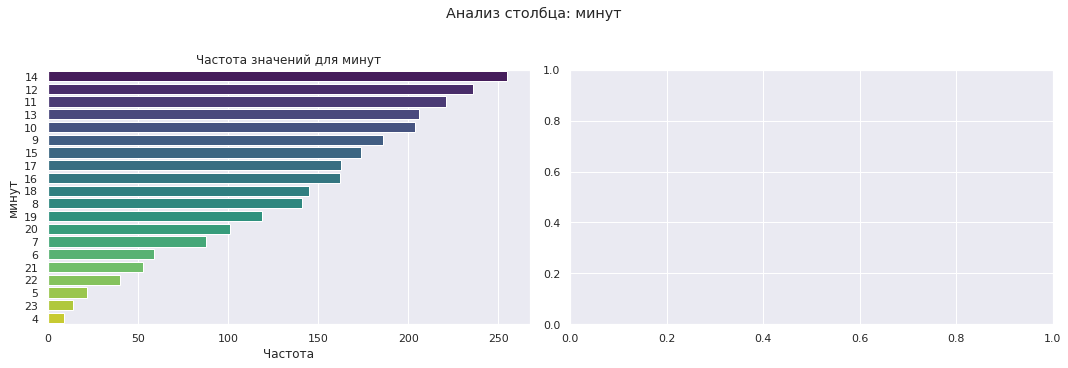

In [26]:
#распределение количественных признаков
#итерация по каждому уникальному периоду из столбца 'Период' в DataFrame 'market_time'
for period in market_time['период'].unique().tolist():
    print(period)
    #визуализация распределения числовой переменной 'минут' для текущего периода
    vid_num_variable(market_time, 'минут')
    market_time['минут'].describe()

'прибыль' определен как НЕПРЕРЫВНЫЙ. Используется histplot и boxplot.


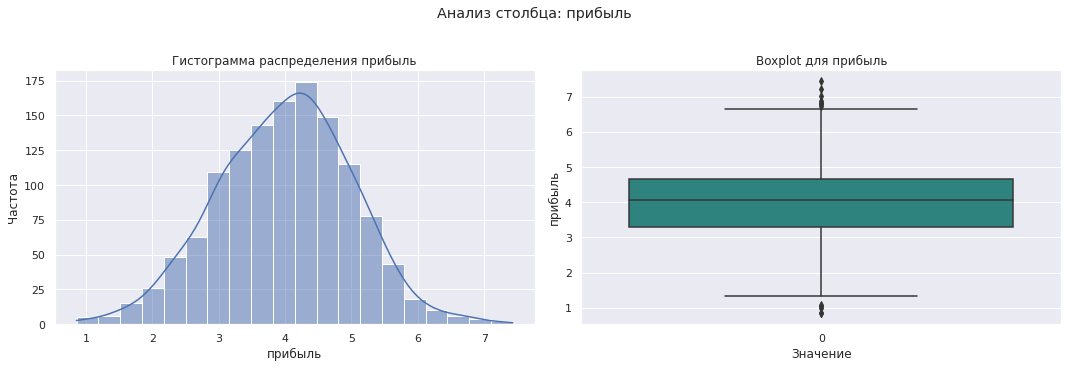

count    1299.000000
mean        3.996721
std         1.014107
min         0.860000
25%         3.300000
50%         4.050000
75%         4.670000
max         7.430000
Name: прибыль, dtype: float64

In [27]:
#распределение количественных признаков
vid_num_variable(money, 'прибыль')
money['прибыль'].describe()

### Отбор активных покупателей за 3-месячный период

In [28]:
#выбираем пользователей, которые не принесли выручку в течение последних 3 месяцев
market_money.query('выручка == 0')

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,препредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0


Так как нам нужны активные пользователи - мы можем удалить неактивных из всех датафреймов.

In [29]:
#удаляем пользователей,у которых покупательская активность менее трёх месяцев
market = market.query('id != [215348, 215357, 215359]')
market_money = market_money.query('id != [215348, 215357, 215359]')
market_time = market_time.query('id != [215348, 215357, 215359]')
money = money.query('id != [215348, 215357, 215359]')

---

### Выводы по анализу данных

 **market**

*   **Маркет_актив_6_мес:** Распределение нормальное, с наличием нескольких низких значений.
*   **Маркет_актив_тек_мес:** Категориальный признак, представленный тремя категориями.
*   **Длительность:** Распределение равномерное и нормальное по всему диапазону значений.
*   **Акционные_покупки:** Имеет бимодальное распределение с выраженными пиками в области 0.2 и вблизи 1. Это указывает на существование группы покупателей, приобретающих товары исключительно по акциям.
*   **Средний_просмотр_категорий_за_визит:** Распределение нормальное.
*   **Неоплаченные_продукты_штук_квартал:** Распределение скошено влево.
*   **Ошибки_сервиса:** Распределение нормальное.
*   **Страниц_за_визит:** Распределение скошено влево, но при этом сохраняет черты нормального.

**Общее замечание по категориальным признакам:** Наблюдается несбалансированность в распределении категориальных признаков.

 **market_money**

*   **Выручка:** Распределение нормальное. Аномальные значения были удалены в ходе предобработки.

**market_time**

*   **Минуты:** Распределение нормальное.

**money**

*   **Прибыль:** Распределение нормальное.

**Критерий отбора данных:** Для анализа были выбраны пользователи, проявлявшие активность в последние месяцы.

---

## Объединение таблиц

Перед объединением нам нужно:
1. Обработать данные по каждому периоду отдельно
2. Удалить столбец ‘Период’, чтобы он не мешал при объединении и не дублировался
3. Гарантировать, что объединение произойдет только по id

In [30]:
#добавление новых столбцов из market_money
#для каждого периода в 'market_money', добавляем соответствующую выручку к 'market'
#суффиксы '_препред' и '_пред' используются для сохранения данных из предыдущих периодов
for name in market_money['период'].unique().tolist():
    market = market.merge(market_money[market_money['период'] == name].drop(columns='период'),
                          on='id',
                          how='left',
                          suffixes=('_препред', '_пред'))

In [31]:
#добавление новых столбцов из market_time
for name in market_time['период'].unique().tolist():
    market = market.merge(market_time[market_time['период'] == name].drop(columns='период'),
                          on='id',
                          how='left',
                          suffixes=('_пред', '_тек'))

### Выводы по объединению таблиц

*   Таблицы были объединены на основе общего признака.
*   Созданы дополнительные колонки для представления значений за несколько периодов.

## Корреляционный анализ

In [32]:
#обзор датасета 'market'
market.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1295
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   покупательская_активность            1296 non-null   object 
 2   тип_сервиса                          1296 non-null   object 
 3   разрешить_сообщать                   1296 non-null   object 
 4   маркет_актив_6_мес                   1296 non-null   float64
 5   маркет_актив_тек_мес                 1296 non-null   int64  
 6   длительность                         1296 non-null   int64  
 7   акционные_покупки                    1296 non-null   float64
 8   популярная_категория                 1296 non-null   object 
 9   средний_просмотр_категорий_за_визит  1296 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 11  ошибка_сервиса                

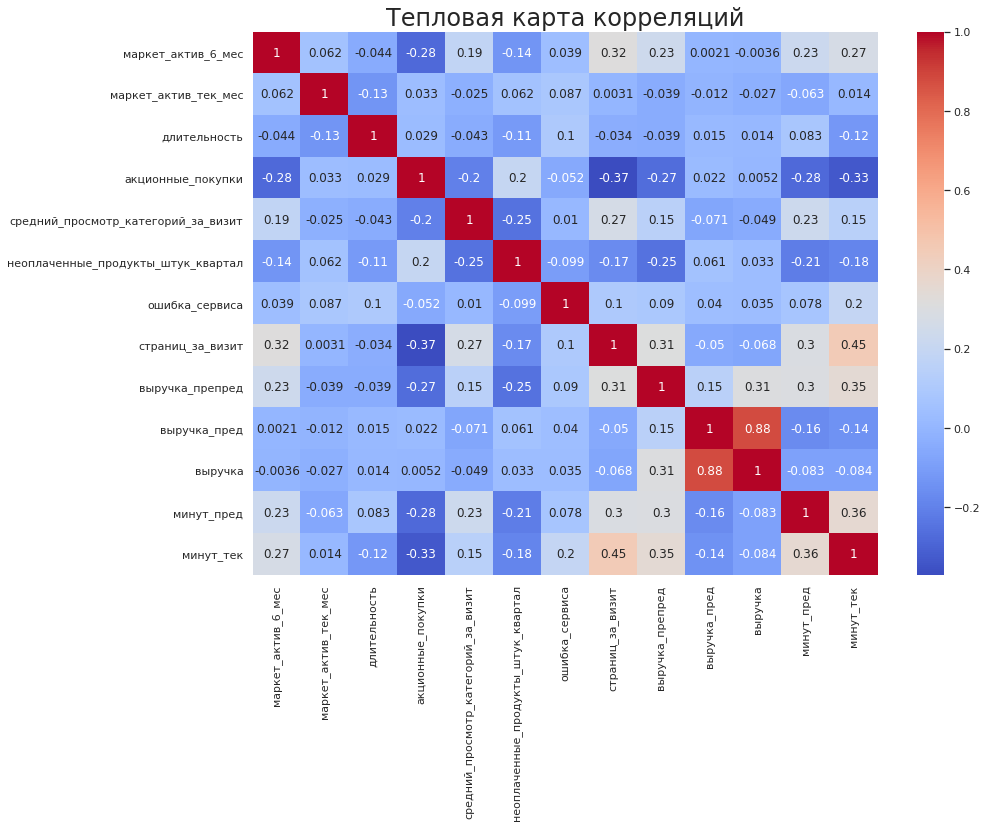

In [33]:
#исследуем взаимосвязи между числовыми переменными, исключая 'id',
#путем построения тепловой карты корреляций
#цвет ячеек показывает силу и направление корреляции, а аннотации - точные значения
plt.figure(figsize=(14,10))
sns.heatmap(
    market[market.select_dtypes(include=['int64', 'float64']).columns.tolist()[1:]].corr(method='spearman'),
    annot=True,
    cmap='coolwarm'
)
plt.title('Тепловая карта корреляций', fontsize=24)
plt.show()

### Выводы по корреляционному анализу данных

**Анализ корреляций (по данным тепловой карты)**

**Ключевые выводы:**

*   **Выручка:**
    *   Отмечена **высокая положительная корреляция** между "Выручка_пред" и "Выручка" (0.84). Это указывает на стабильную зависимость текущей выручки от предыдущих показателей.
    *   "Акционные_покупки" имеет **отрицательную корреляцию** с "Выручка_пред" (-0.26). Это может говорить о том, что пользователи, совершающие акционные покупки, в меньшей степени влияют на общую выручку, или же это связано с другими факторами.

*   **Активность пользователя на сайте:**
    *   **Сильная положительная корреляция** между "Страниц_за_визит" и "Минуты_тек" (0.43) предполагает, что пользователи, просматривающие больше страниц, также проводят больше времени в текстовом контенте.
    *   "Страниц_за_визит" **положительно коррелирует** с "Рынок_актив_6_мес" (0.32), указывая на связь между активностью на рынке и глубиной просмотра контента.
    *   "Средний_просмотр_категорий_за_визит" **положительно коррелирует** с "Рынок_актив_6_мес" (0.2) и "Страница_за_визит" (0.24), что говорит о том, что пользователи, активно исследующие категории, также демонстрируют большую активность на рынке и просматривают больше страниц.

*   **Поведение, связанное с заказами:**
    *   "Неоплаченные_продукты_штук_квартал" **отрицательно коррелирует** с "Рынок_актив_6_мес" (-0.17) и "Средний_просмотр_категорий_за_визит" (-0.27). Это может указывать на то, что активные пользователи рынка и те, кто активно просматривает категории, реже оставляют неоплаченные заказы.
    *   "Ошибки_сервиса" показывает **слабую положительную корреляцию** с большинством числовых признаков, включая "Неоплаченные_продукты_штук_квартал" (0.088), что может намекать на незначительное влияние ошибок на возникновение неоплаченных заказов.

*   **Активность на рынке:**
    *   "Рынок_актив_6_мес" **положительно коррелирует** с "Страница_за_визит" (0.32) и "Минуты_тек" (0.29), а также умеренно с "Минуты_пред" (0.22).
    *   "Рынок_актив_6_мес" **отрицательно коррелирует** с "Акционные_покупки" (-0.24) и "Неоплаченные_продукты_штук_квартал" (-0.17).

**Выводы по отдельным показателям:**

*   **"Рынок_актив_тек_мес"** демонстрирует **слабую корреляцию** с большинством признаков, что указывает на его низкую взаимосвязь с общими метриками.
*   **"Длительность"** также имеет **слабые корреляции** с большинством показателей, за исключением "Акционные_покупки" (0.029).

**Общие наблюдения:**

* Отсутствие сильных корреляций (близких к 0.9-1.0) между большинством пар признаков (кроме "Выручка_пред" и "Выручка") предполагает, что мультиколлинеарность в данном наборе данных, вероятно, не будет значительной проблемой при построении моделей.
*   Большинство категориальных признаков несбалансированы.


## Использование пайплайнов

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    market.drop(['покупательская_активность', 'id'], axis=1), #отделяем признаки от целевой переменной, удаляем 'id'
    market['покупательская_активность'], #выбираем целевую переменную
    test_size = TEST_SIZE, #определяем размер тестовой выборки
    random_state = RANDOM_STATE, #фиксируем случайное состояние для воспроизводимости
    stratify = market['покупательская_активность']) #делаем разделение с учетом целевой переменной

#кодирование целевого признака
label_encoder = LabelEncoder() #инициализируем кодировщик меток
y_train = label_encoder.fit_transform(y_train) #кодируем обучающую целевую переменную
y_test = label_encoder.transform(y_test) #кодируем тестовую целевую переменную

#определяем категориальные и числовые признаки
cat_columns = ['тип_сервиса', 'разрешить_сообщать', 'популярная_категория'] 
num_columns = [
    'маркет_актив_6_мес',
    'маркет_актив_тек_мес',
    'длительность',
    'акционные_покупки',
    'средний_просмотр_категорий_за_визит',
    'неоплаченные_продукты_штук_квартал',
    'ошибка_сервиса',
    'страниц_за_визит',
    'выручка_препред',
    'выручка_пред',
    'выручка',
    'минут_пред',
    'минут_тек',
              ]
                 
#создаём пайплайн для подготовки категориальных признаков
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')), #заполняем пропуски частым значением
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)) #отбрасываем первый столбец и игнорируя неизвестные
    ]
    )

#создаём общий пайплайн для подготовки данных (категориальные и числовые признаки)
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, cat_columns), #применяем пайплайн для категориальных признаков
     ('num', MinMaxScaler(), num_columns) #применяем Min-Max масштабирование для числовых признаков
    ], 
    remainder='passthrough' #оставляем остальные признаки без изменений
)

#создаём итоговый пайплайн: сначала подготовка данных, затем модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor), #шаг подготовки данных
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE)) #шаг с моделью дерева решений
])

#параметры для передачи GridSearchCV для поиска оптимальной модели (общий набор)
param_grid = {
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'], #варианты масштабирования для числовых признаков
    'models': [DecisionTreeClassifier(random_state=RANDOM_STATE), #варианты моделей
               KNeighborsClassifier(),
               SVC(probability=True, random_state=RANDOM_STATE),
               LogisticRegression(random_state=RANDOM_STATE)]
}

#параметры для поиска оптимальной модели с использованием GridSearchCV (распределённые по моделям)
param_distributions = [
    #словарь с параметрами для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)], # Указываем модель
        'models__max_depth': range(2, 5), #диапазон для максимальной глубины дерева
        'models__max_features': range(2, 5), #диапазон для максимального количества признаков
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'] #варианты масштабирования для числовых признаков
    },
    
    #словарь с параметрами для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()], #указываем модель
        'models__n_neighbors': range(2, 5), #диапазон для количества соседей
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'] #варианты масштабирования для числовых признаков
    },

    #словарь с параметрами для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )], #указываем модель с конкретными параметрами
        'models__C': range(1, 5), #диапазон для параметра регуляризации C
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'] #варианты масштабирования для числовых признаков
    }
]

In [35]:
#поиск оптимальной модели без перебора гиперпараметров
grid_0 = GridSearchCV(
    pipe_final, 
    param_grid=param_grid, 
    cv=5,
    scoring='roc_auc', #оценка качества модели по ROC-AUC
    n_jobs=-1 #использование всех доступных ядер процессора для ускорения вычислений
)

#обучение модели на тренировочной выборке
grid_0.fit(X_train, y_train) #подбор лучшей комбинации предобработки и модели на обучающих данных

#вывод лучшей модели
print('Лучшая модель и её параметры:\n\n', grid_0.best_params_) #найденная лучшая модель

#вывод метрики лучшей модели
print('Метрика ROC-AUC для лучшей модели:\n', grid_0.best_score_.round(2)) #лучшее значение метрики ROC-AUC

Лучшая модель и её параметры:

 {'models': SVC(probability=True, random_state=42), 'preprocessor__num': StandardScaler()}
Метрика ROC-AUC для лучшей модели:
 0.91


In [36]:
#поиск оптимальной модели с перебором гиперпараметров
grid_1 = GridSearchCV(
    pipe_final, 
    param_grid=param_distributions, #использование словарей с различными гиперпараметрами для разных моделей
    cv=5, 
    scoring='roc_auc', #оценка качества модели по метрике ROC-AUC
    n_jobs=-1, #использование всех доступных ядер процессора для ускорения вычислений
)

#обучение модели на тренировочной выборке
grid_1.fit(X_train, y_train) #обучение и поиск лучших гиперпараметров для каждой модели на обучающих данных

print('Метрика ROC-AUC для лучшей модели:\n', grid_1.best_score_.round(2)) #лучшее значение метрики ROC-AUC
print('Лучшая модель и её параметры:\n', grid_1.best_params_) #найденная лучшая модель

Метрика ROC-AUC для лучшей модели:
 0.9
Лучшая модель и её параметры:
 {'models': LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear'), 'models__C': 1, 'preprocessor__num': MinMaxScaler()}


In [37]:
#получаем предсказанные вероятности классов для тестовой выборки
y_pred = grid_0.predict_proba(X_test) 
#вычисляем и выводим метрику ROC-AUC на тестовой выборке, используя вероятности для положительного класса (индекс 1)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_pred[:, 1]).round(2)}') 

Метрика ROC-AUC на тестовой выборке: 0.91


### Выводы по оценке модели

*   **Выбор метрики:** Для оценки качества модели выбрана метрика **ROC-AUC**. Данная метрика является предпочтительной, поскольку:
    *   Применима к широкому спектру задач, включая бинарную классификацию.
    *   Менее подвержена влиянию дисбаланса классов по сравнению с другими метриками.
    *   Значение ROC-AUC легко интерпретируется: более высокое значение указывает на лучшую производительность модели.

*   **Результаты моделирования:**
    *   Определена наиболее удачная модель и ее оптимальные параметры.
    *   Наилучший результат продемонстрировала модель **SVC (Support Vector Classifier)**.

## Анализ важности признаков

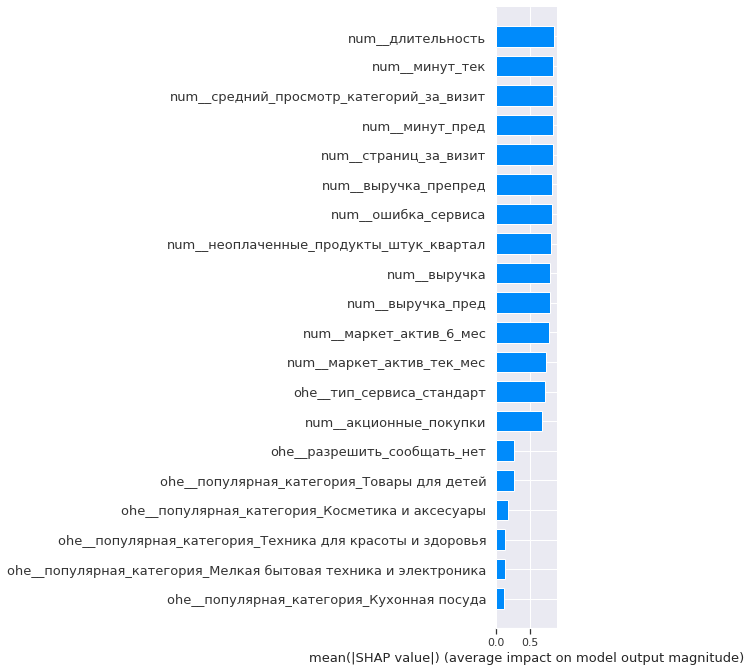

In [38]:
#поиск важных признаков
#кодируем и масштабируем обучающие данные с помощью лучшего препроцессора из grid_0
X_encoded_0 = grid_0.best_estimator_['preprocessor'].fit_transform(X_train) 
#обучаем лучшую модель из grid_0 на закодированных и масштабированных данных
model_0 = grid_0.best_estimator_['models'].fit(X_encoded_0, y_train) 
#создаем объект PermutationExplainer для оценки важности признаков
explainer_0 = shap.PermutationExplainer(model_0, X_encoded_0)

#получаем имена признаков после всех этапов кодирования и преобразования
labels_0 = grid_0.best_estimator_[:-1].get_feature_names_out()

#визуализация важности признаков
#отображаем столбчатую диаграмму важности признаков
shap.summary_plot(X_encoded_0, plot_type='bar', feature_names=labels_0) 

### Выводы по анализу важности признаков

**Важность признаков**

Анализ важности признаков (на основе SHAP значений) показал, что следующие признаки оказывают наибольшее влияние на выход модели:

*   **num\_\_Длительность**
*   **num\_\_минут\_тек**
*   **num\_\_Средний\_просмотр\_категорий\_за\_визит**
*   **num\_\_минут\_пред**
*   **num\_\_Страниц\_за\_визит**

Эти признаки являются ключевыми для понимания поведения пользователей и, следовательно, могут быть эффективно использованы для сегментации пользователей.

**Применимость для сегментации**

Выявленные наиболее важные признаки предоставляют основу для создания значимых пользовательских сегментов. Например, можно сегментировать пользователей по:

*   **Длительности их взаимодействия с сервисом:** долгосрочные пользователи vs. новые.
*   **Временной активности:** пользователи, активные в последнее время vs. давно неактивные.
*   **Глубине просмотра:** пользователи, просматривающие много категорий vs. ограниченный выбор.
*   **Количеству просмотренных страниц за визит:** пользователи, детально изучающие контент vs. быстро просматривающие.

Такая сегментация позволит проводить более таргетированные маркетинговые кампании и персонализировать пользовательский опыт.

## Сегментация покупателей

In [39]:
#добавление к данным вероятности отношения к классу 1

#присваиваем колонке 'Вероятность' в X_test предсказанные вероятности принадлежности к классу 1
X_test['вероятность'] = y_pred[:, 1]

#сортируем DataFrame X_test по возрастанию значений в колонке 'Вероятность'
df = X_test.sort_values(by='вероятность')
df.head()

,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_препред,выручка_пред,выручка,минут_пред,минут_тек,вероятность
485,премиум,да,4.9,3,888,0.14,Техника для красоты и здоровья,3,1,6,9,5268.0,4698.0,4893.0,18,15,0.016490
695,премиум,да,3.9,4,572,0.14,Мелкая бытовая техника и электроника,4,2,2,6,5194.0,6262.0,5696.5,18,16,0.020425
1113,стандарт,да,4.9,4,739,0.17,Мелкая бытовая техника и электроника,5,1,4,4,5180.0,5917.6,5505.5,15,18,0.021465
453,стандарт,нет,4.1,4,808,0.15,Мелкая бытовая техника и электроника,4,2,3,13,4691.0,4746.1,4126.0,16,12,0.021675
1060,стандарт,да,5.5,3,847,0.11,Мелкая бытовая техника и электроника,5,1,5,4,5233.0,5351.8,5227.0,16,14,0.022551


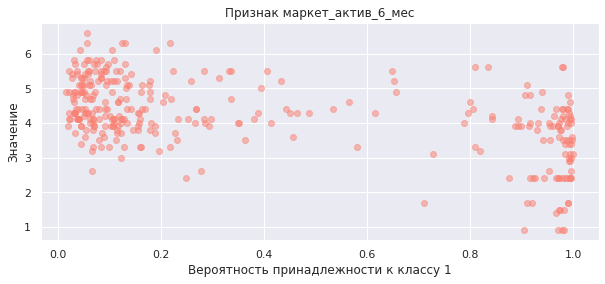

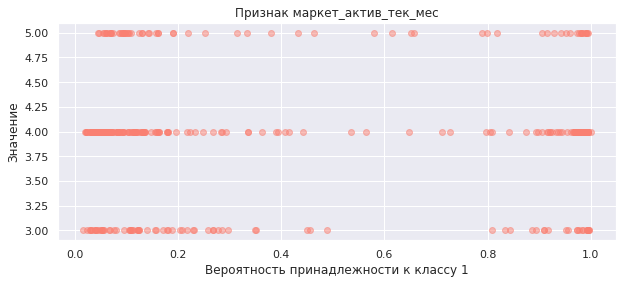

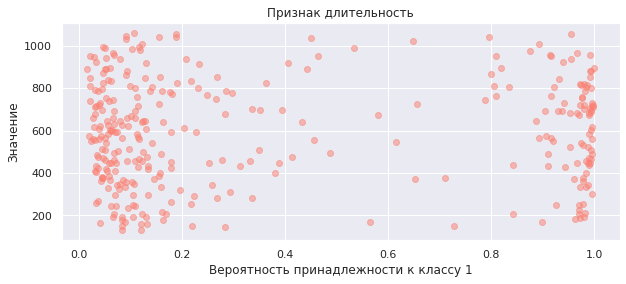

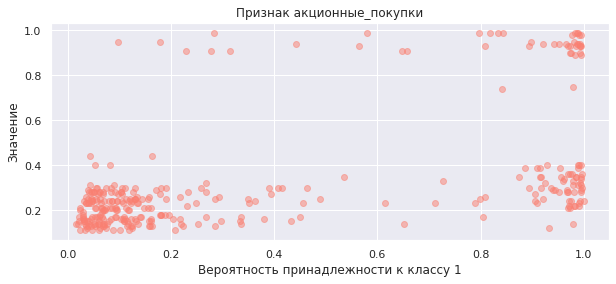

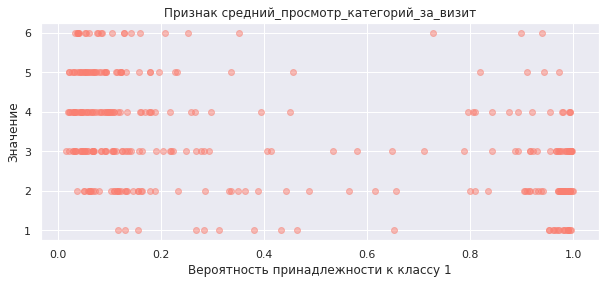

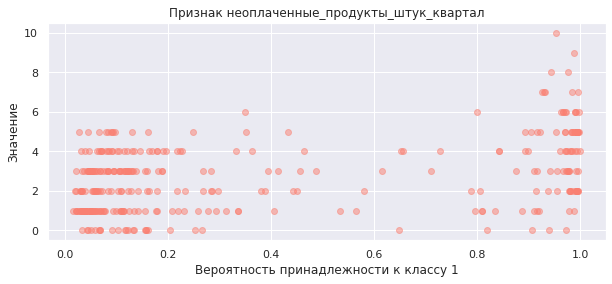

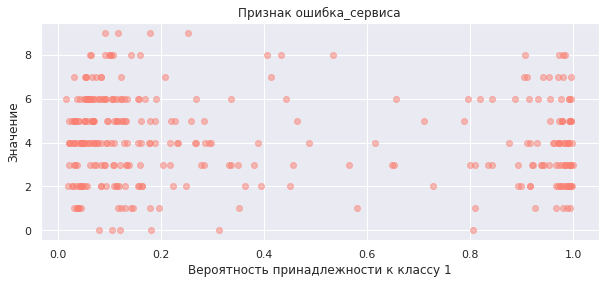

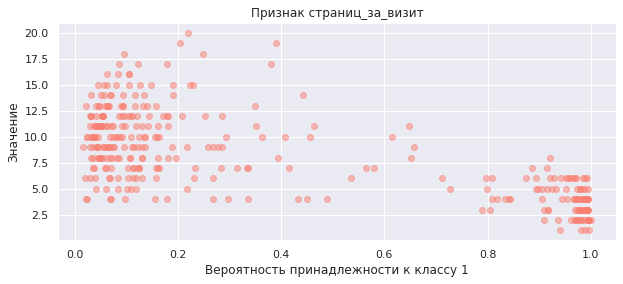

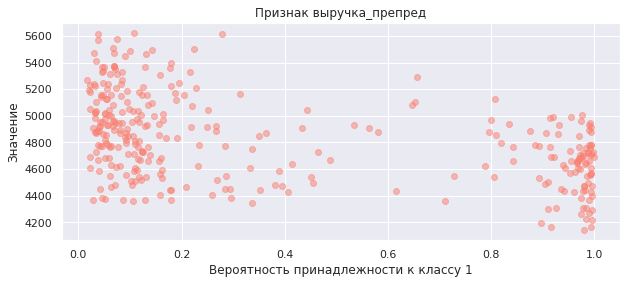

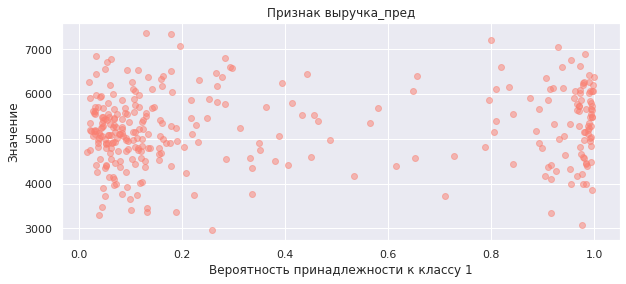

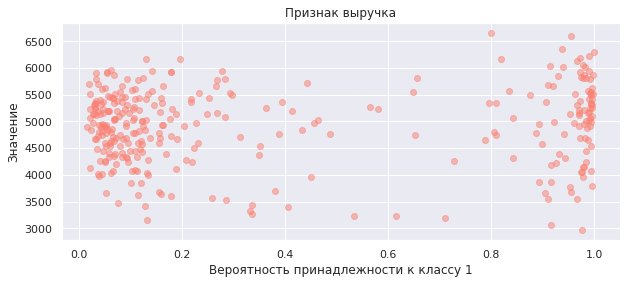

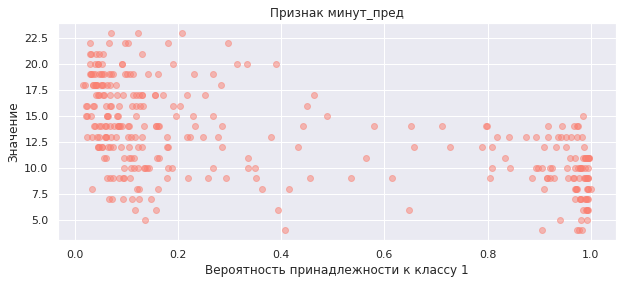

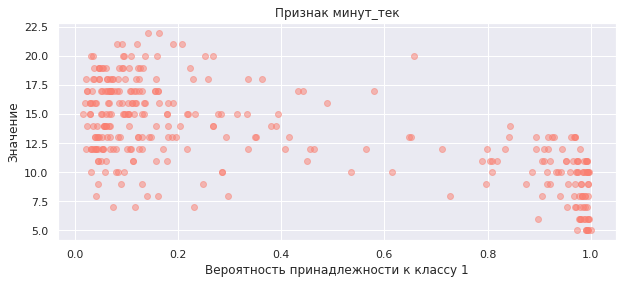

In [40]:
#итерируемся по каждому числовому признаку
for name in num_columns:
    #создаем новую фигуру для каждого графика
    plt.figure(figsize=(10, 4))
    plt.title(f'Признак {name}')
    plt.xlabel('Вероятность принадлежности к классу 1')
    plt.ylabel('Значение')
    #строим диаграмму рассеяния:
    #x - предсказанная вероятность (из df)
    #y - значения текущего признака (df[name])
    #alpha=0.5 - полупрозрачность точек
    plt.scatter(x=df['вероятность'], 
                y=df[name],
                alpha=0.5, 
                c='salmon')

### Сегментация Покупателей по Активности

На основе анализа данных были определены пороговые значения для классификации покупателей по уровню активности. К сегменту **"Покупатели со сниженной активностью"** относятся пользователи, соответствующие следующим критериям:

*   **"Маркет_актив_6_мес"** < 3
*   **"Акционные_покупки"** > 0.6
*   **"Средний_просмотр_категорий_за_визит"** < 3
*   **"Неоплаченные_продукты_штук_квартал"** > 5
*   **"Страниц_за_визит"** < 7
*   **"Выручка_препред"** < 5000
*   **"Минуты_пред"** < 14
*   **"Минуты_тек"** < 14

Для прочих анализируемых признаков четкое определение пороговых значений для данной сегментации представляется затруднительным.

### Отдельный сегмент: "Акционные покупатели"

Также был выделен отдельный сегмент пользователей, для которых характерна высокая доля покупок акционных товаров.

In [41]:
#фильтруем DataFrame df, оставляя только строки, где значение в колонке 'Выручка_препред' меньше 5000
df_5000 = df.query('выручка_препред < 5000')

'маркет_актив_6_мес' определен как НЕПРЕРЫВНЫЙ. Используется histplot и boxplot.


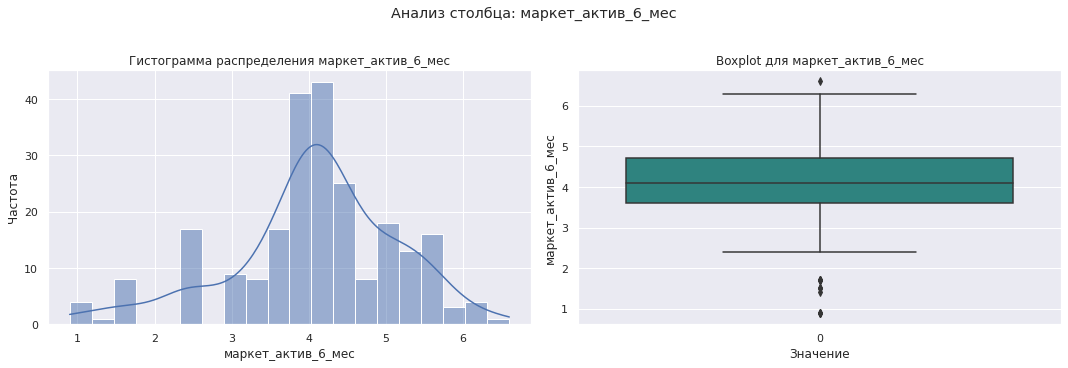

'маркет_актив_тек_мес' определен как ДИСКРЕТНЫЙ. Используется countplot.


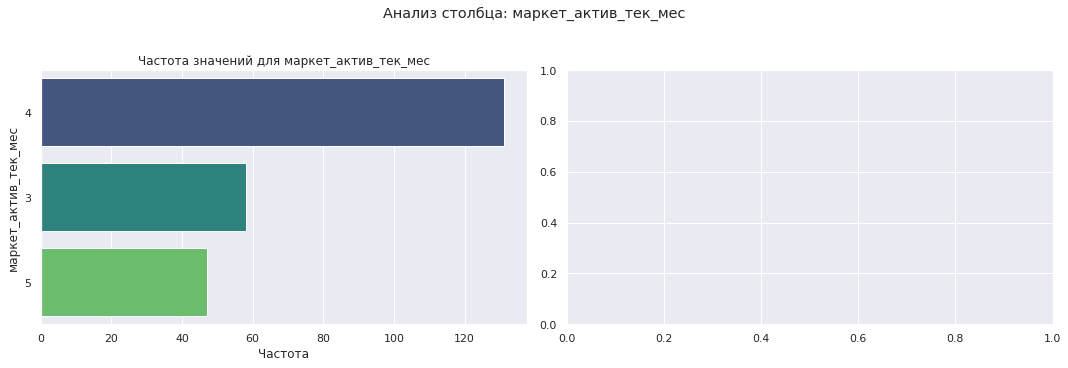

'длительность' определен как НЕПРЕРЫВНЫЙ. Используется histplot и boxplot.


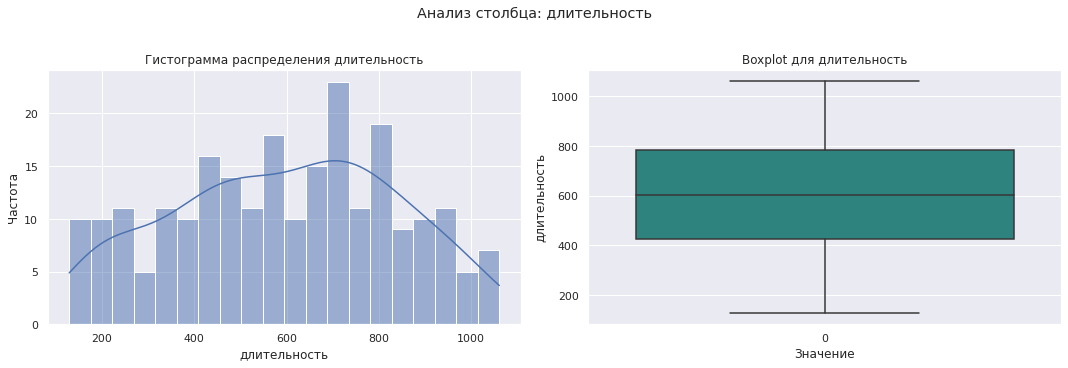

'акционные_покупки' определен как НЕПРЕРЫВНЫЙ. Используется histplot и boxplot.


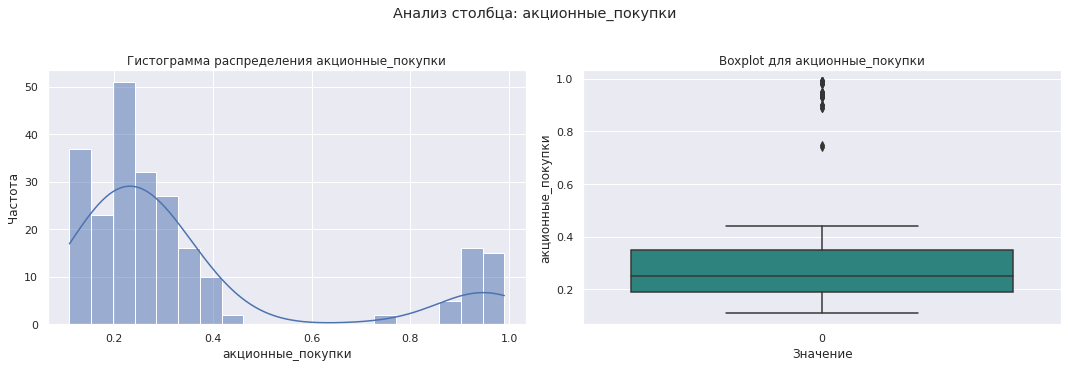

'средний_просмотр_категорий_за_визит' определен как ДИСКРЕТНЫЙ. Используется countplot.


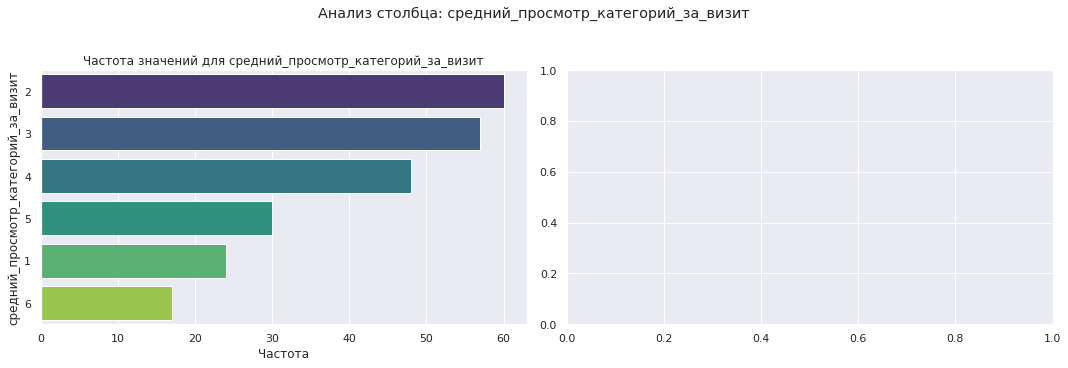

'неоплаченные_продукты_штук_квартал' определен как ДИСКРЕТНЫЙ. Используется countplot.


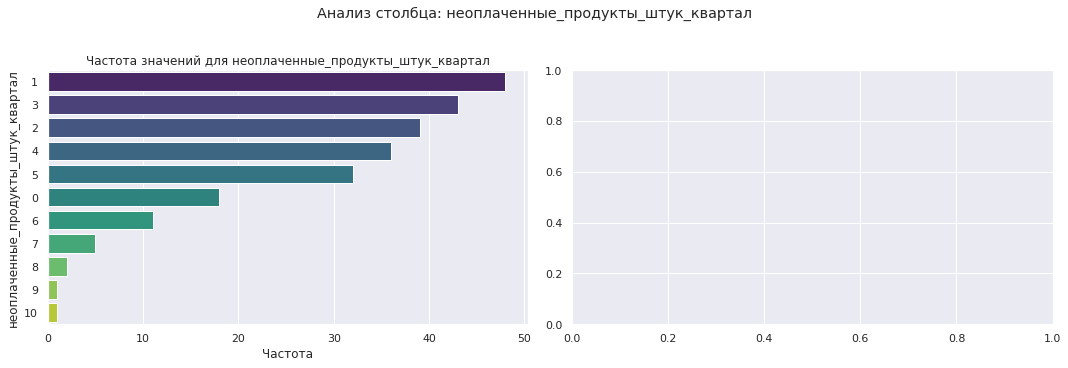

'ошибка_сервиса' определен как ДИСКРЕТНЫЙ. Используется countplot.


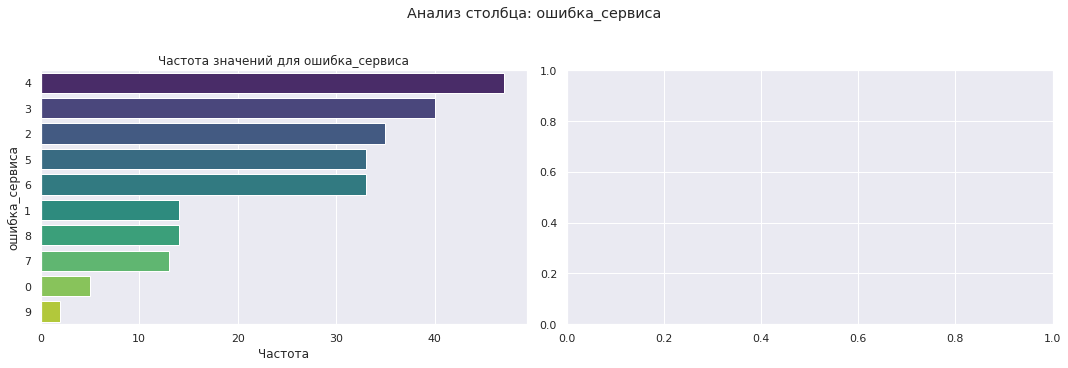

'страниц_за_визит' определен как ДИСКРЕТНЫЙ. Используется countplot.


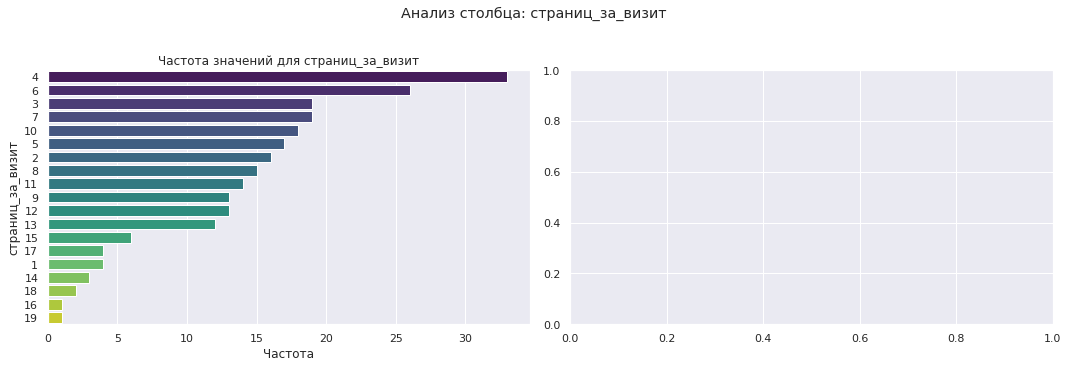

'выручка_препред' определен как НЕПРЕРЫВНЫЙ. Используется histplot и boxplot.


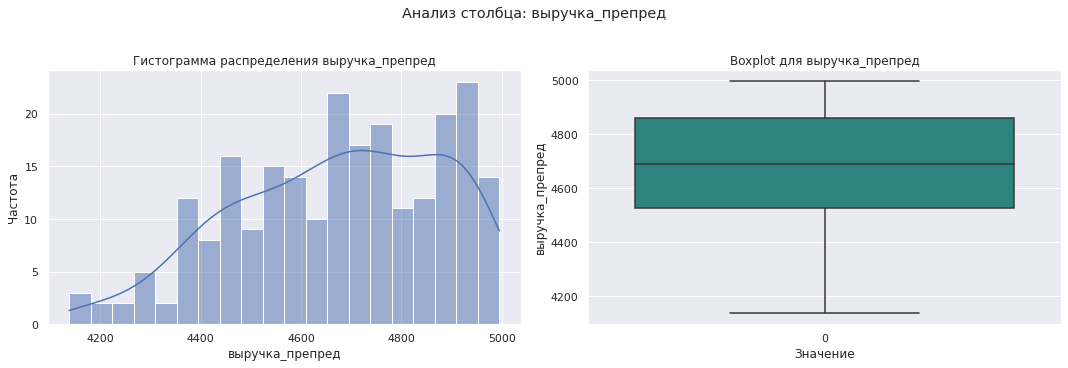

'выручка_пред' определен как НЕПРЕРЫВНЫЙ. Используется histplot и boxplot.


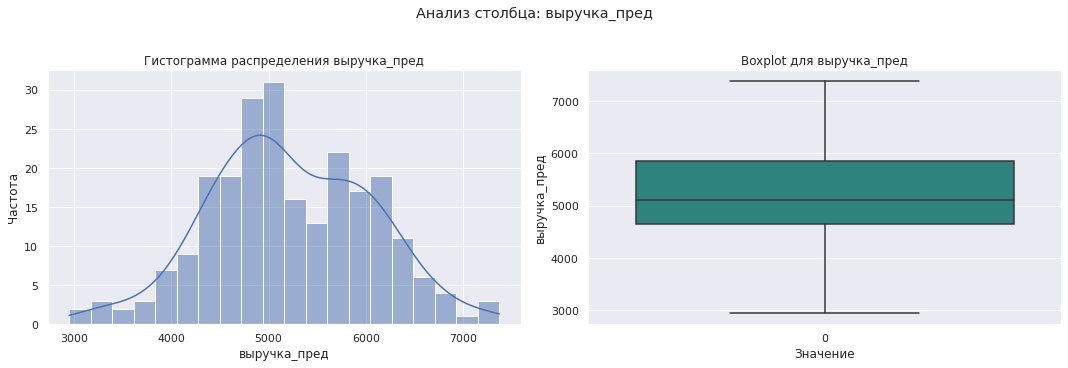

'выручка' определен как НЕПРЕРЫВНЫЙ. Используется histplot и boxplot.


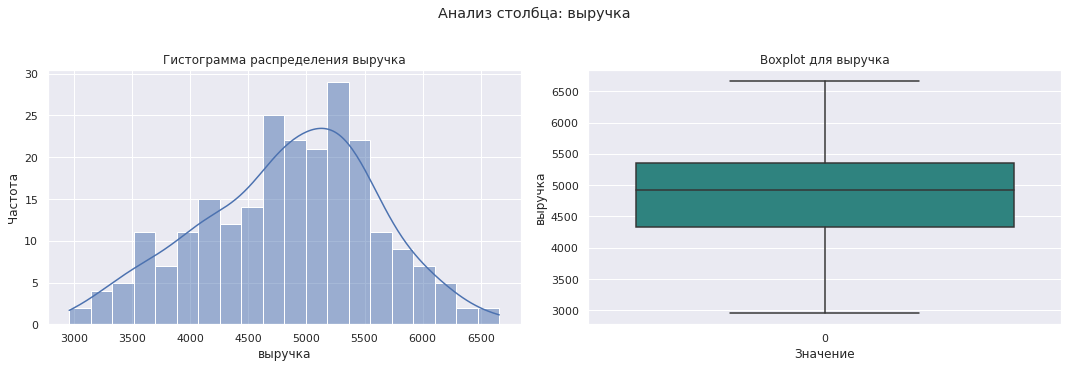

'минут_пред' определен как ДИСКРЕТНЫЙ. Используется countplot.


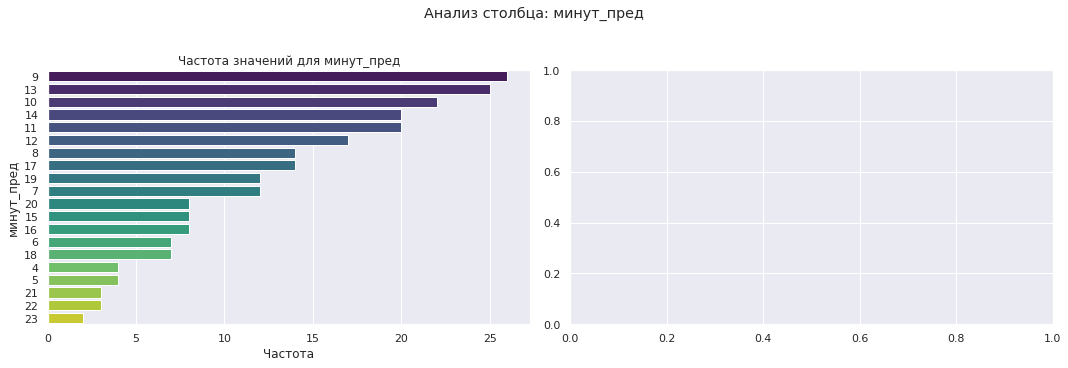

'минут_тек' определен как ДИСКРЕТНЫЙ. Используется countplot.


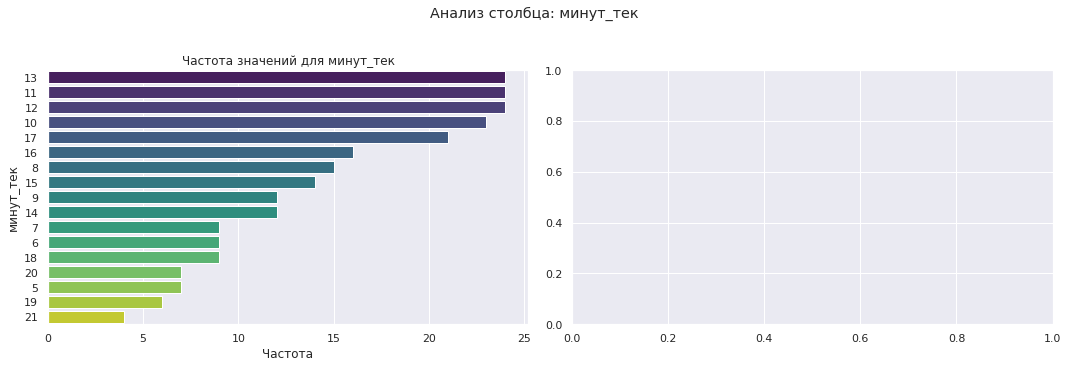

In [42]:
#распределение количественных признаков (только для данных с 'Выручка_препред' < 5000)
for name in num_columns:
    vid_num_variable(df_5000, name)

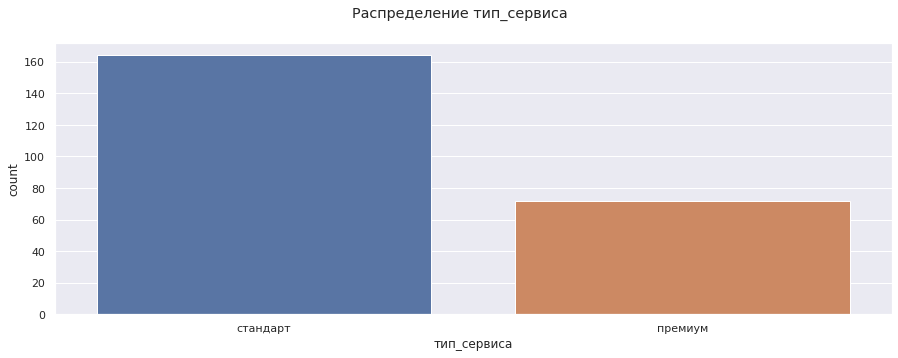

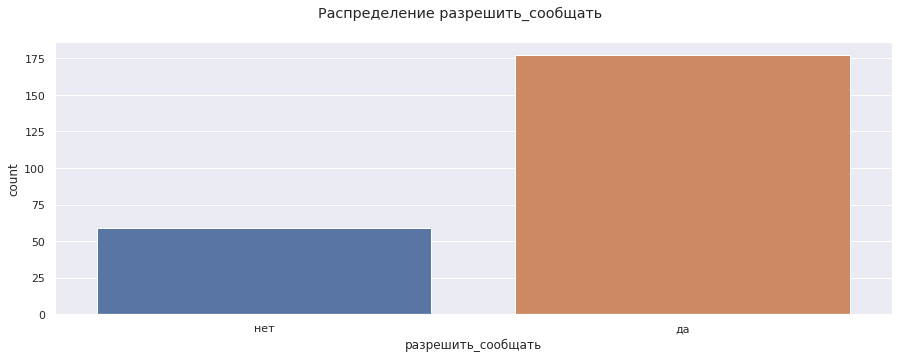

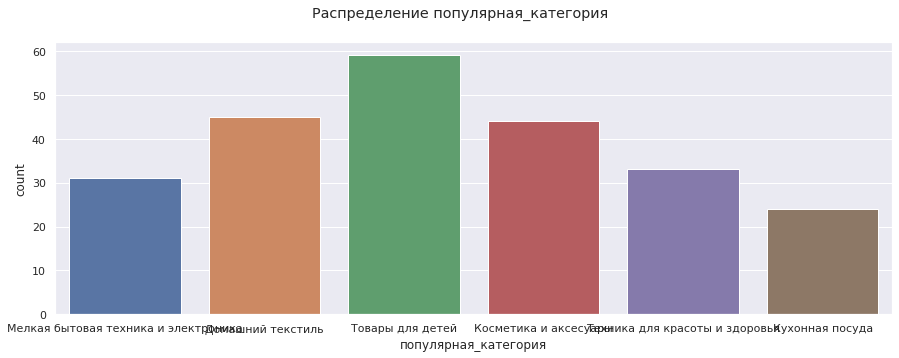

In [43]:
#распределение категориальных признаков
for name in cat_columns:
    vid_cat_variable(df_5000, name)

### Покупатели товаров для детей и домашнего текстиля

Данный сегмент пользователей характеризуется преимущественно приобретением товаров для детей и домашнего текстиля. Важно отметить, что большинство покупателей из этой категории редко пользуются акционными предложениями.

**Рекомендации для сегмента "Покупатели товаров для детей и домашнего текстиля":**

*   **Целевые акции на товары для детей:** Проводить рассылки и кампании с акциями, ориентированные именно на детские товары.
*   **Комбинированные предложения:** Разработать акции, включающие как товары для детей, так и домашний текстиль (например, "купите детскую одежду и получите скидку на постельное белье").
*   **Создание контента:** Предлагать полезный контент, связанный с детскими товарами (например, советы по выбору, обзоры новинок) и домашним уютом.
*   **Изучение предпочтений:** Провести опросы или глубинные интервью для более точного понимания их потребностей и предпочтений в акциях.

In [44]:
#объединяем DataFrame 'market' с DataFrame 'money'
#по колонке 'id', используя 'left' join (оставляем все строки из 'market')
market = market.merge(money, on='id', how='left')
market.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_препред,выручка_пред,выручка,минут_пред,минут_тек,прибыль
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4472.0,4971.6,5216.0,10,12,4.16
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,4826.0,5058.4,5457.5,13,8,3.13
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,4793.0,6610.4,6158.0,13,11,4.87
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4594.0,5872.5,5807.5,11,8,4.21
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5124.0,5388.5,4738.5,10,10,3.95


In [45]:
#визуализация распределения числовых признаков в зависимости от покупательской активности
def vid_market_num_variable(df, column):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    plt.title(f'Гистограмма {column}')
    sns.histplot(data=df, x=column, hue='покупательская_активность')
    plt.xlabel(column)
    plt.ylabel('Частота')
    
    plt.subplot(1, 2, 2)
    plt.title(f'Диаграмма размаха {column}')
    sns.boxplot(x='покупательская_активность', y=column, data=df);
    plt.ylabel(column)

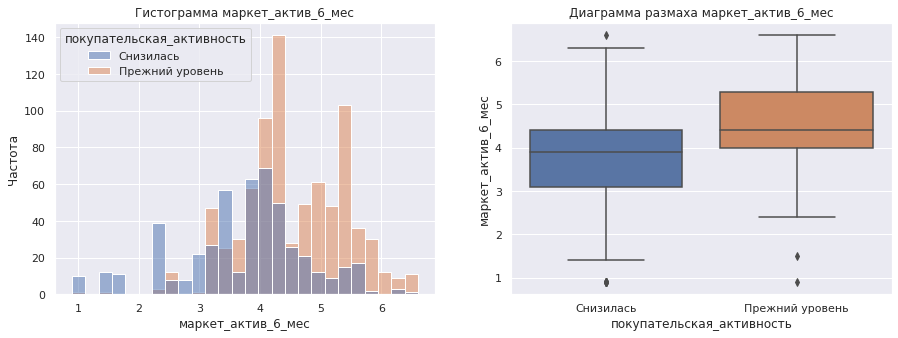

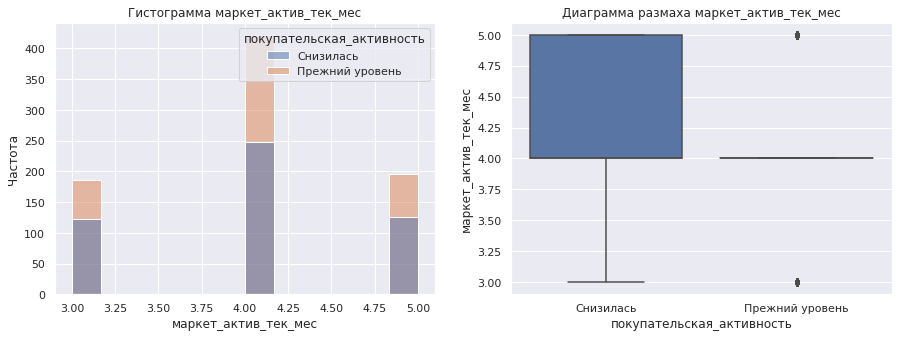

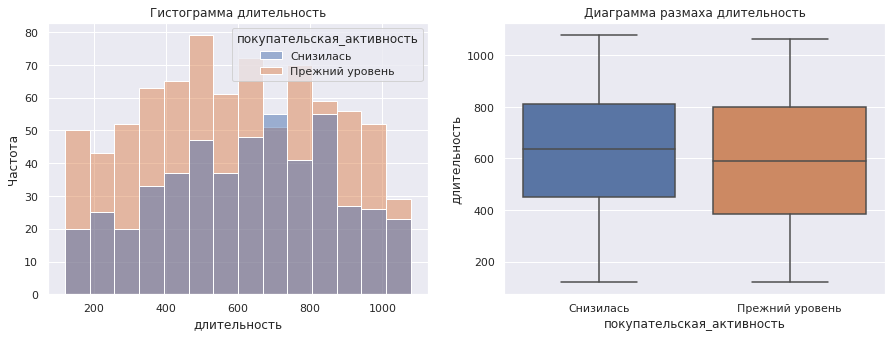

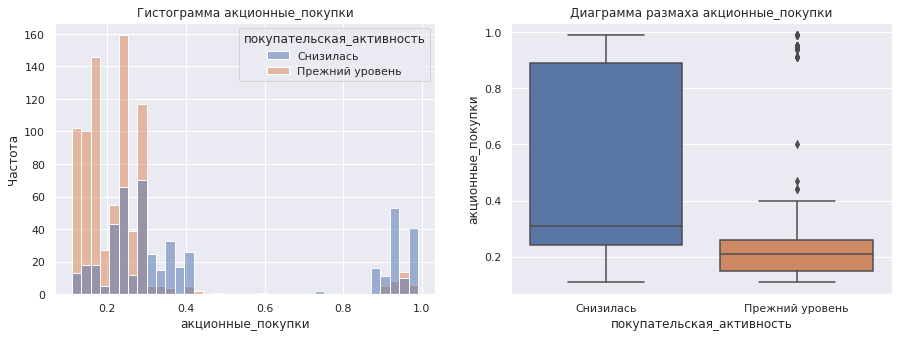

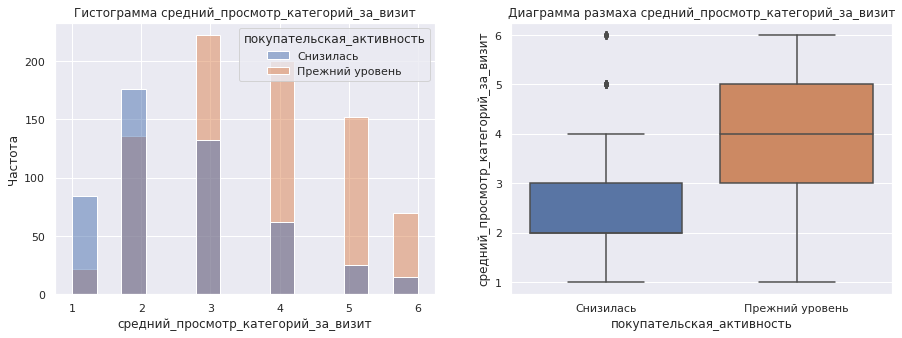

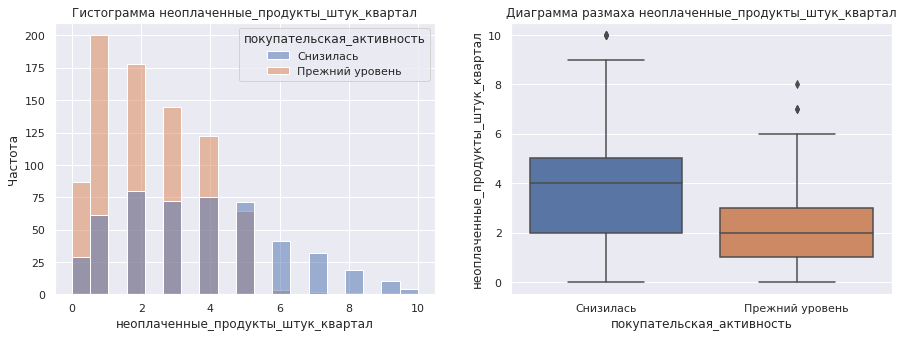

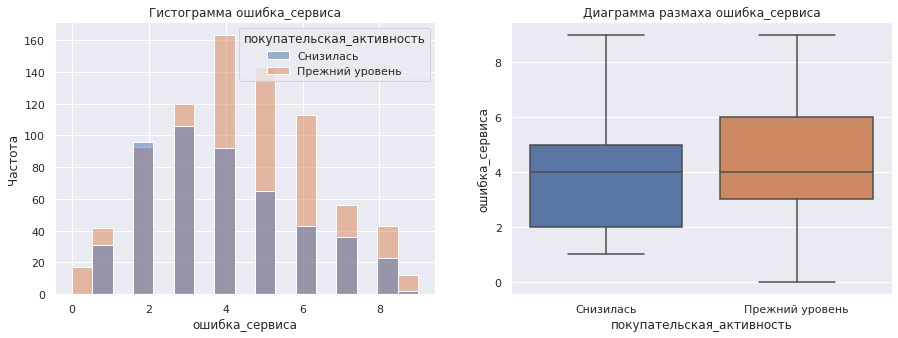

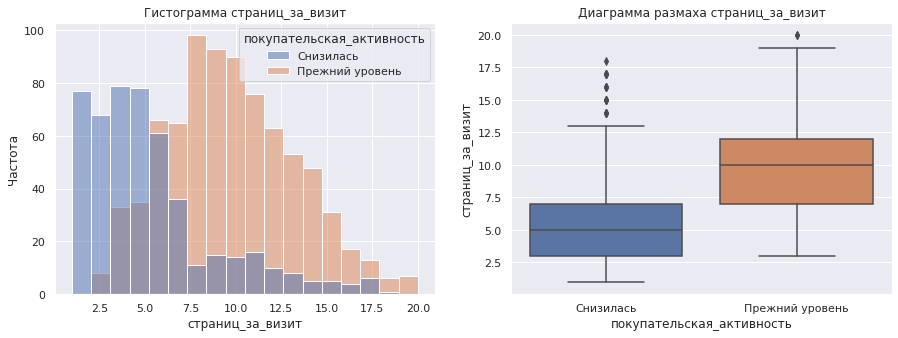

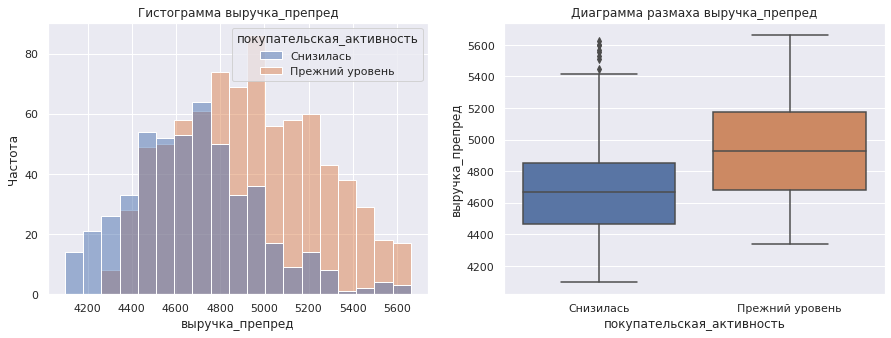

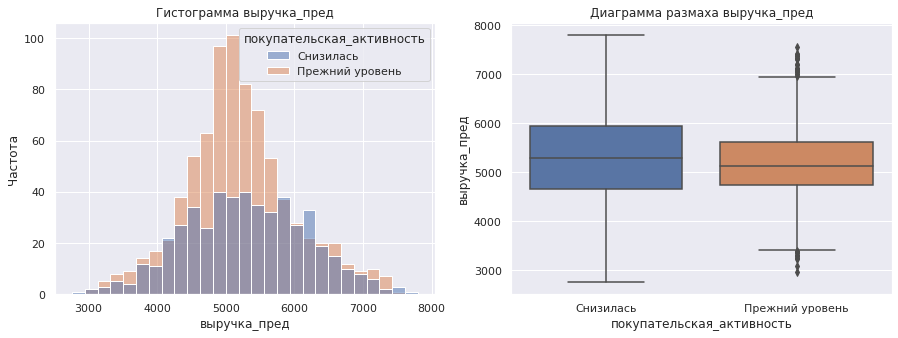

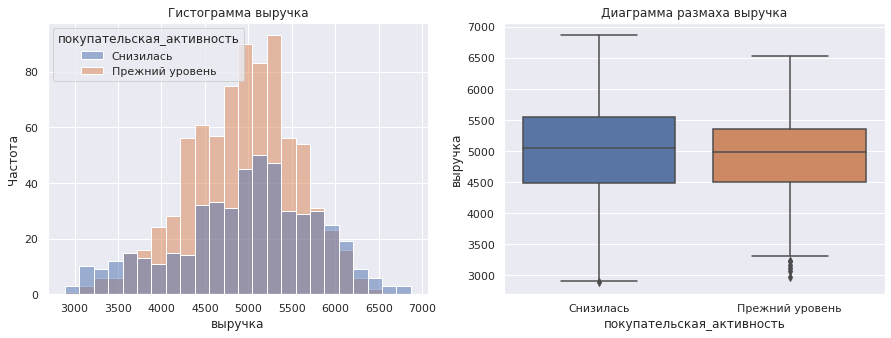

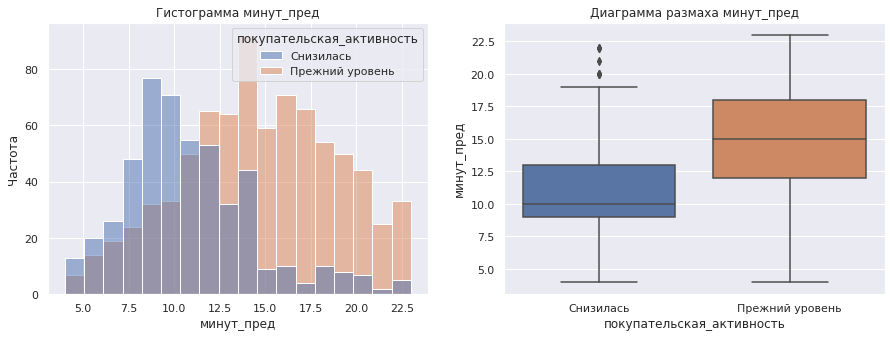

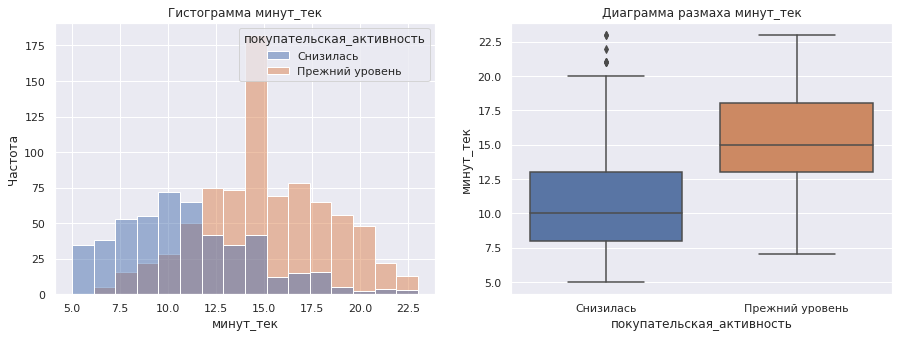

In [46]:
#перебираем каждый числовой признак (названия которых хранятся в списке num_columns)
for column in num_columns:
    vid_market_num_variable(market, column)

**Анализ Покупательской Активности: Сравнение Сегментов**

Наблюдается незначительная разница в покупательской активности между сегментом пользователей, у которых активность снизилась, и теми, у кого она осталась на прежнем уровне. Тем не менее, выделение отдельных групп покупателей по другим критериям представляется более перспективным.

---

**Сегментация по Категориям Товаров**

Для дальнейшей детализации клиентской базы предлагается выделить пользователей по категориям приобретаемых ими товаров. Это позволит разработать более точечные маркетинговые стратегии и персонализированные предложения.

In [47]:
#фильтруем DataFrame 'market', оставляя только записи, где 'Популярная_категория' равна "Товары для детей"
market_kids = market.query('популярная_категория == "Товары для детей"')
market_kids.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_препред,выручка_пред,выручка,минут_пред,минут_тек,прибыль
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4472.0,4971.6,5216.0,10,12,4.16
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,4793.0,6610.4,6158.0,13,11,4.87
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4594.0,5872.5,5807.5,11,8,4.21
6,215355,Снизилась,стандарт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4,4749.0,3772.6,3263.0,10,12,5.26
12,215363,Снизилась,стандарт,нет,4.9,4,923,0.29,Товары для детей,6,0,3,1,4633.0,6128.3,6010.0,5,8,1.83


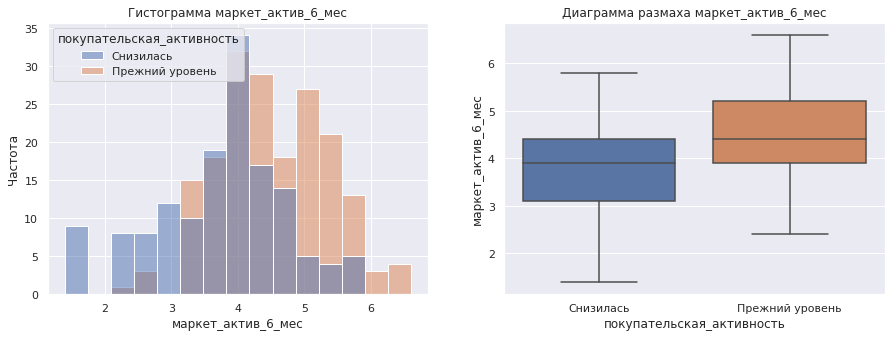

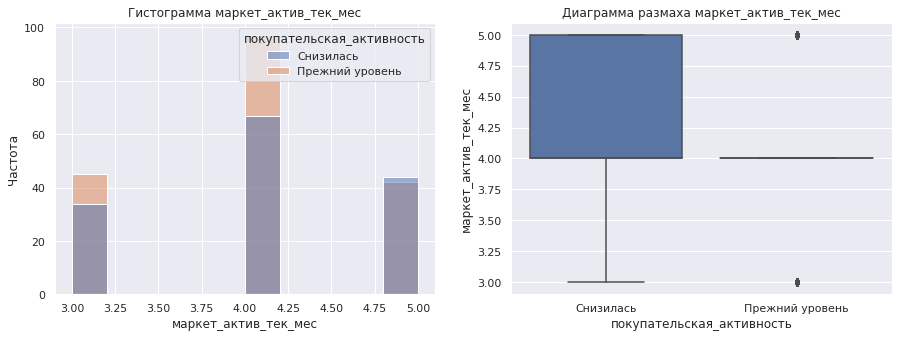

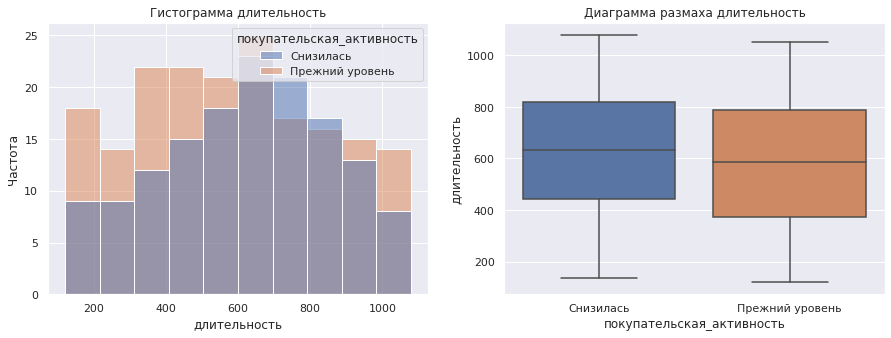

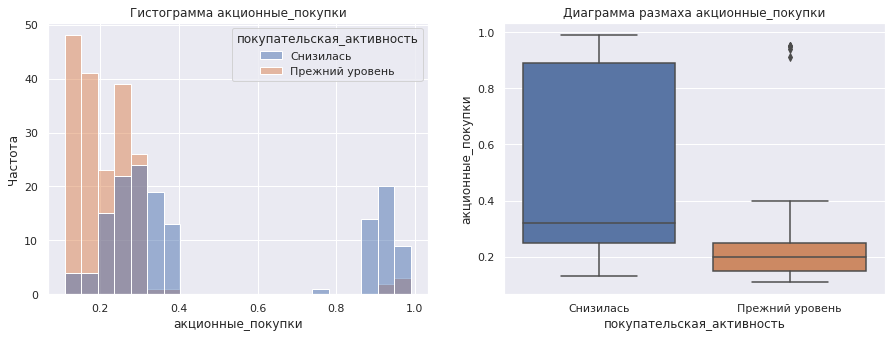

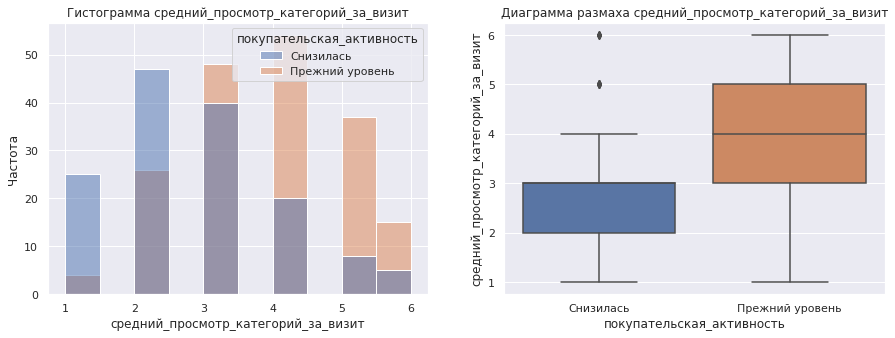

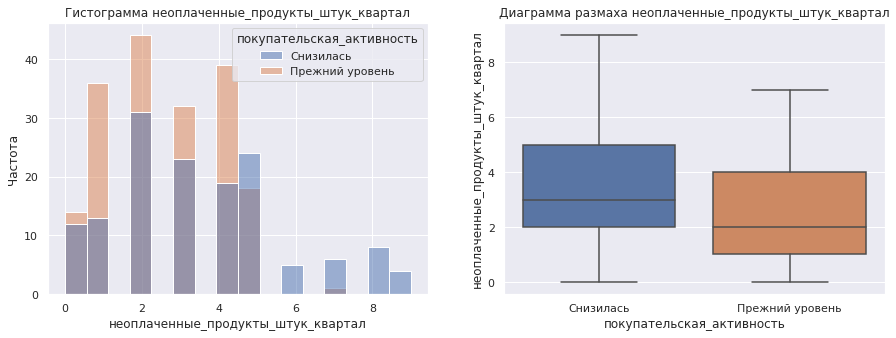

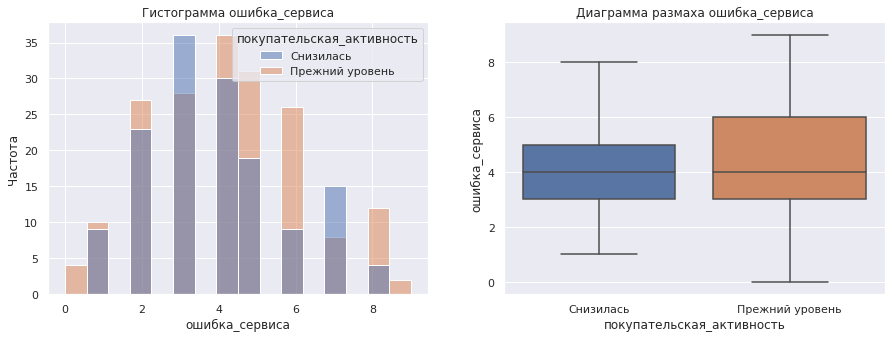

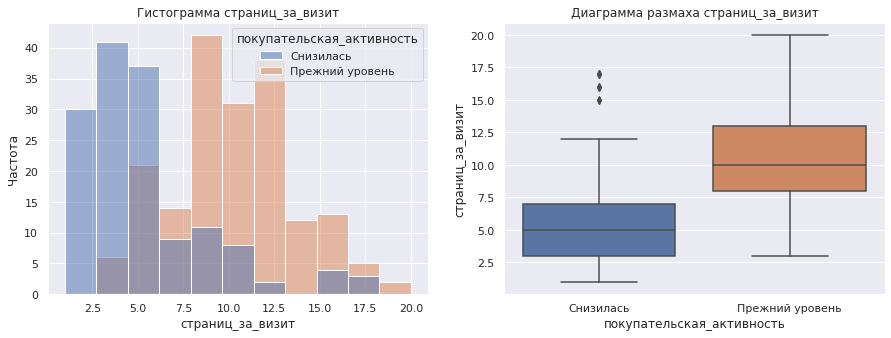

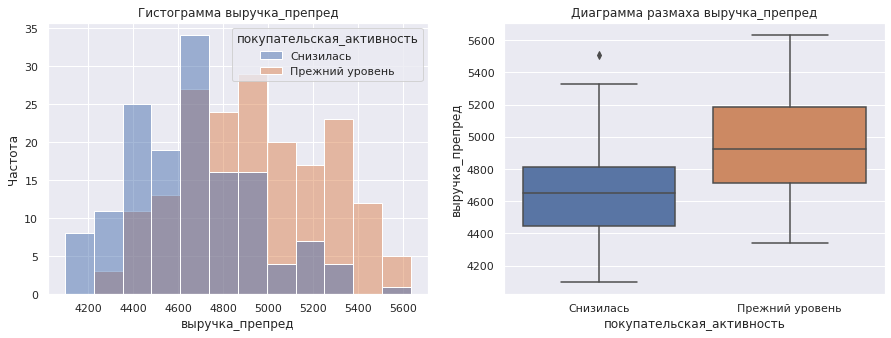

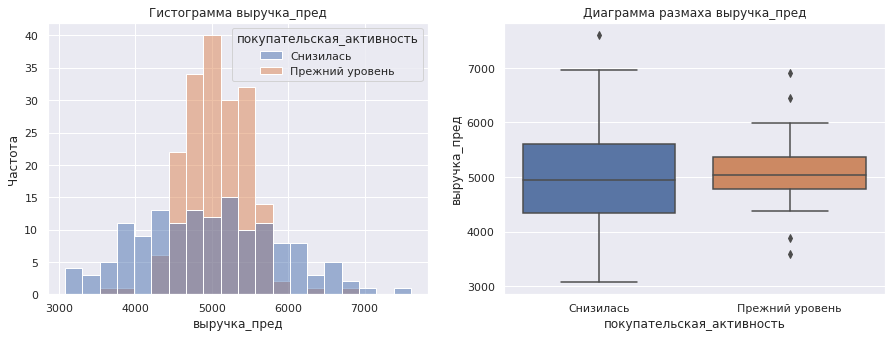

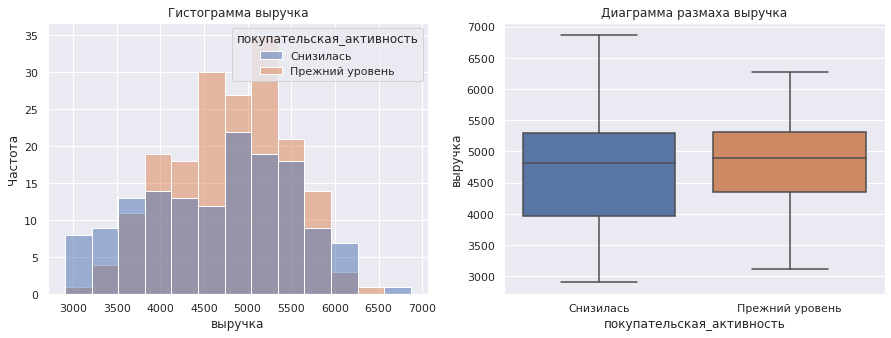

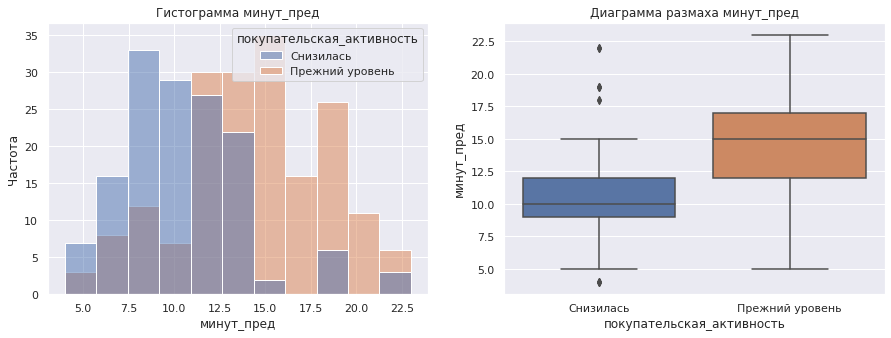

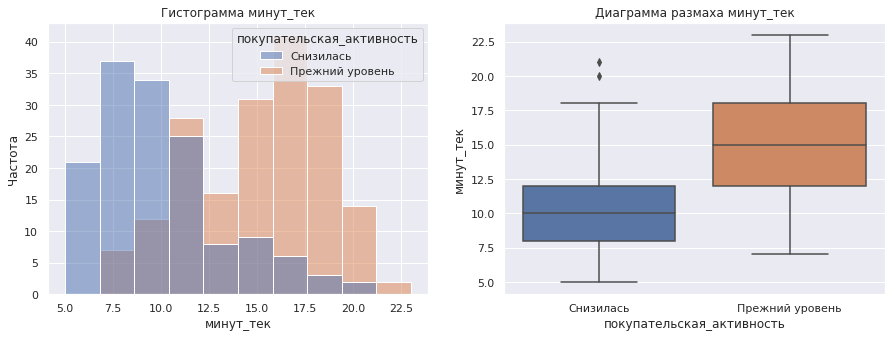

In [48]:
#перебираем каждый числовой признак, названия которых хранятся в списке num_columns
for column in num_columns:
    vid_market_num_variable(market_kids, column)

### Поведение сегмента "Преимущественно акционные покупатели"

Пользователи данного сегмента характеризуются следующими особенностями:

*   **Приоритет акционных предложений:** Основная доля их покупок приходится на товары по акции.
*   **Ограниченное исследование категорий:** Как правило, они не изучают другие категории товаров.
*   **Низкая вовлеченность:** Просматривают небольшое количество страниц за визит и проводят минимальное время на сайте.

**Динамика Выручки: Сравнение Сегментов**

Анализ выручки показывает следующую динамику:

*   **2 месяца назад:** Пользователи со сниженной покупательской активностью генерировали меньше выручки по сравнению с группой с прежним уровнем активности.
*   **Текущий и предыдущий месяцы:** Уровень выручки у этих двух сегментов приблизительно выровнялся.

**Рекомендации по стимулированию продаж и увеличению вовлеченности**

Для сегмента пользователей, преимущественно покупающих по акции, а также для более активного вовлечения в других категориях, предлагаются следующие меры:

**1. Стимулирование покупки детских товаров:**

*   **Целевые акции на детские товары:** Инициировать специальные предложения на товары для детей.
*   **Баннеры и уведомления:** Размещать информацию об акциях на видных местах сайта (главная страница, верхняя часть каталога, баннеры).
*   **Email-маркетинг:** Настроить рассылки с подборками акционных детских товаров для тех, кто ранее проявлял интерес к данной категории.

**2. Увеличение среднего чека и количества просматриваемых страниц:**

*   **Комбинированные предложения:** Создать комплекты "акционный товар + сопутствующий товар" по выгодной цене. Например, если акция на подгузники, предложить сопутствующие влажные салфетки со скидкой.
*   **"С этим товаром часто покупают":** Внедрить релевантные рекомендации товаров на карточках акционных позиций.
*   **Программа лояльности:** Разработать простую программу лояльности, где за покупки (не только по акции) начисляются баллы, которые можно использовать для получения скидок.

**3. Повышение времени пребывания на сайте и глубины просмотра:**

*   **Интерактивный контент:** Создавать обзоры, гайды, статьи, связанные с детскими товарами и домашним текстилем, которые могут заинтересовать пользователей и побудить их к более длительному изучению сайта.
*   **Видео-обзоры:** Размещать короткие видео-обзоры акционных товаров, демонстрирующие их преимущества.
*   **Персонализированные рекомендации:** На основе истории просмотров и покупок предлагать другие товары, которые могут их заинтересовать, даже если они не участвуют в текущих акциях.

**4. Анализ и доработка:**

*   **A/B тестирование:** Проводить тестирование различных вариантов акций, баннеров и рекомендаций, чтобы определить наиболее эффективные.
*   **Повторный анализ:** Регулярно отслеживать динамику выручки и поведения пользователей после внедрения новых стратегий.

## Общий Вывод: Результаты Предобработки, Анализа Данных, Корреляций, Оценки Модели и Сегментации

**Соответствие и Качество Данных:**

*   Проверка данных подтвердила их полное соответствие исходному описанию.
*   Таблицы не содержат пропущенных значений, что исключает необходимость их заполнения или удаления.
*   Типы данных в столбцах были корректно определены.
*   Проведена очистка от неявных дубликатов, повысившая чистоту датасета.
*   Скорректировано некорректное название столбца: `market`.

**Анализ Распределения Признаков:**

*   **`Market_актив_6_мес`**: Распределение нормальное, с наличием нескольких низких значений.
*   **`Market_актив_тек_мес`**: Категориальный признак, представленный тремя категориями.
*   **`Длительность`**: Распределение равномерное и нормальное по всему диапазону значений.
*   **`Акционные_покупки`**: Бимодальное распределение с выраженными пиками в районе 0.2 и около 1. Это указывает на существование группы покупателей, приобретающих товары исключительно по акциям.
*   **`Средний_просмотр_категорий_за_визит`**: Распределение нормальное.
*   **`Неоплаченные_продукты_штук_квартал`**: Распределение скошено влево.
*   **`Ошибки_сервиса`**: Распределение нормальное.
*   **`Страниц_за_визит`**: Распределение скошено влево, но при этом сохраняет черты нормального.

*   **`Выручка`** (`market_money`): Распределение нормальное. Аномальные значения были удалены в ходе предобработки.
*   **`Минуты`** (`market_time`): Распределение нормальное.
*   **`Прибыль`** (`money`): Распределение нормальное.

**Анализ Корреляций (на основе тепловой карты):**

*   **`Выручка_пред` и `Выручка`**: Наблюдается высокая положительная корреляция (коэффициент **0.84**). Это свидетельствует о тесной зависимости между выручкой за предыдущий и текущий периоды. При этом коэффициент не достигает **0.9**, что говорит об отсутствии явной мультиколлинеарности, кроме этой пары.

**Критерий Отбора Данных:**

*   Для проведения анализа были выбраны пользователи, проявлявшие активность в последние месяцы.

**Выводы по Оценке Модели:**

*   **Выбор метрики:** Для оценки качества модели выбрана метрика **ROC-AUC**. Эта метрика предпочтительна, поскольку:
    *   Применима к широкому спектру задач, включая бинарную классификацию.
    *   Менее подвержена влиянию дисбаланса классов по сравнению с другими метриками.
    *   Значение ROC-AUC легко интерпретируется: более высокое значение указывает на лучшую производительность модели.
*   **Результаты моделирования:**
    *   Определена наиболее удачная модель и ее оптимальные параметры.
    *   Наилучший результат продемонстрировала модель **SVC (Support Vector Classifier)**.

**Важность Признаков (на основе SHAP значений):**

Анализ важности признаков выявил следующие ключевые факторы, влияющие на выход модели:

*   `num__Длительность`
*   `num__минут_тек`
*   `num__Средний_просмотр_категорий_за_визит`
*   `num__минут_пред`
*   `num__Страниц_за_визит`

Эти признаки являются критически важными для понимания поведения пользователей и могут быть эффективно применены для сегментации.

**Сегментация Пользователей:**

На основе анализа данных были определены следующие сегменты пользователей:

**Покупатели со сниженной активностью:**

К этому сегменту относятся пользователи, соответствующие следующим критериям:

*   `Маркет_актив_6_мес` < 3
*   `Акционные_покупки` > 0.6
*   `Средний_просмотр_категорий_за_визит` < 3
*   `Неоплаченные_продукты_штук_квартал` > 5
*   `Страниц_за_визит` < 7
*   `Выручка_препред` < 5000
*   `Минуты_пред` < 14
*   `Минуты_тек` < 14

Для прочих анализируемых признаков четкое определение пороговых значений для данной сегментации представляется затруднительным.

**"Акционные покупатели":**

*   **Особенности:** Приоритет акционных предложений, ограниченное исследование других категорий, низкая вовлеченность (мало просматриваемых страниц и времени на сайте).
*   **Динамика выручки:** Ранее генерировали меньше выручки, чем группа с прежней активностью, но в последние месяцы уровни выровнялись.
*   **Рекомендации:**
    *   Целевые акции на детские товары с визуальным размещением на видных местах.
    *   Комбинированные предложения (акционный товар + сопутствующий).
    *   Рекомендации товаров ("с этим товаром часто покупают").
    *   Программа лояльности.
    *   Email-маркетинг с акциями на детские товары.

**Покупатели товаров для детей и домашнего текстиля:**

Данный сегмент пользователей характеризуется преимущественно приобретением товаров для детей и домашнего текстиля. Важно отметить, что большинство покупателей из этой категории редко пользуются акционными предложениями.

**Рекомендации по Сегментации и Маркетингу:**

**Для сегмента "Покупатели со сниженной активностью":**

*   **Персонализированные предложения:** Разработать кампании, предлагающие скидки или бонусы на товары, которыми они интересовались ранее, но не совершили покупку.
*   **Упрощение процесса покупки:** Оптимизировать путь пользователя на сайте, уменьшить количество шагов для оформления заказа.
*   **Напоминания о брошенных корзинах:** Внедрить систему автоматических напоминаний о товарах, оставленных в корзине.
*   **Программа лояльности:** Предложить стимулы для повторных покупок, например, накопительные скидки или эксклюзивные предложения.

**Для сегмента "Акционные покупатели":**

*   **Продвижение новых акций:** Оперативно информировать эту группу о старте новых распродаж и специальных предложений.
*   **Сегментация по категориям акций:** Анализировать, на какие типы акций реагирует данный сегмент, и предлагать им наиболее релевантные.
*   **Создание наборов "акционный товар + сопутствующий":** Предлагать выгодные комплекты, включающие популярные акционные товары.

**Для сегмента "Покупатели товаров для детей и домашнего текстиля":**

*   **Целевые акции на товары для детей:** Проводить рассылки и кампании с акциями, ориентированные именно на детские товары.
*   **Комбинированные предложения:** Разработать акции, включающие как товары для детей, так и домашний текстиль (например, "купите детскую одежду и получите скидку на постельное белье").
*   **Создание контента:** Предлагать полезный контент, связанный с детскими товарами (например, советы по выбору, обзоры новинок) и домашним уютом.
*   **Изучение предпочтений:** Провести опросы или глубинные интервью для более точного понимания их потребностей и предпочтений в акциях.

**9. Общие Наблюдения:**

*   **Несбалансированность категориальных признаков:** Большинство категориальных признаков характеризуются несбалансированным распределением, что требует внимания при построении моделей.
*   **Отсутствие явной мультиколлинеарности (кроме выручки):** За исключением сильной корреляции между показателями выручки, между большинством признаков не выявлено явной мультиколлинеарности.
*   **Применимость ключевых признаков для сегментации:** Выявленные наиболее важные признаки (`Длительность`, `минут_тек`, `Средний_просмотр_категорий_за_визит`, `минут_пред`, `Страниц_за_визит`) предоставляют прочную основу для создания значимых пользовательских сегментов (по длительности взаимодействия, временной активности, глубине просмотра, количеству просмотренных страниц).

**Итоговое резюме:** Данные прошли полную предобработку и многосторонний анализ, включая оценку модели и сегментацию пользователей. Выявлены закономерности в распределении признаков, сильная корреляция между показателями выручки, определена оптимальная модель классификации (SVC) с использованием метрики ROC-AUC. На основе анализа важности признаков предложены эффективные методы сегментации. Разработаны конкретные рекомендации для каждого выявленного сегмента, направленные на повышение продаж, вовлеченности и персонализацию пользовательского опыта.